# **Project Predictive Analytics Hepatitis C**

- **Nama:** Fatikha Hudi Aryani
- **Email:** fatikhahudiaryani621@gmail.com
- **ID Dicoding:** fatikha_hudi_aryani

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# **Dataset Loading**

Dataset yang akan dipakai dalam proyek ini diambil dari platform Kaggle. Maka dari itu untuk dapat mengambil dataset dari Kaggle, perlu dilakukan konfigurasi kredensial API Kaggle di Google Colab. Kaggle menyediakan API yang memungkinkan akses langsung ke dataset tanpa perlu mengunduhnya secara manual.
Proses ini dilakukan dengan mengunggah file kaggle.json yang berisi kredensial API yang diunduh dari halaman akun Kaggle.

In [2]:
# Memuat data
from google.colab import files
files.upload()  # Pilih file kaggle.json yang sudah didownload

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fatikhaa","key":"5e2c440fbdb0ca6926b1524dcd294f4b"}'}

In [3]:
# Konfigurasi akses ke API Kaggle dari google colab
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Atur permission

In [4]:
!kaggle datasets list  # Cek apakah bisa mengakses API

ref                                                              title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance             Student Habits vs Academic Performance                 19512  2025-04-12 10:49:08.663000          31535        554  1.0              
adilshamim8/social-media-addiction-vs-relationships              Students' Social Media Addiction                        7851  2025-05-10 14:38:02.713000           5910         90  1.0              
mahdimashayekhi/social-media-vs-productivity                     Social Media vs Productivity                         2374382  2025-05-15 20:01:03.167000           1796         29  1.0              
jaina

In [5]:
# Download dataset dari kaggle dan unzip file
!kaggle datasets download -d fedesoriano/hepatitis-c-dataset
!unzip hepatitis-c-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset
License(s): ODbL-1.0
  0% 0.00/14.8k [00:00<?, ?B/s]
100% 14.8k/14.8k [00:00<00:00, 35.0MB/s]
Archive:  hepatitis-c-dataset.zip
  inflating: HepatitisCdata.csv      


Dengan kredensial yang telah diunggah, code "!kaggle datasets download -d fedesoriano/hepatitis-c-dataset" digunakan untuk mengunduh dataset yang berjudul "hepatitis-c-dataset" dari Kaggle.

Kemudian file yang telah diunduh dalam format ZIP diekstrak menggunakan perintah "!unzip hepatitis-c-dataset.zip" dengan tujuan untuk mengakses file data dalam format CSV yang ada di dalamnya.

Lalu, ubah dataset yang telah berhasil diunduh dalam format CSV ke dalam variabel DataFrame.

In [6]:
# Baca file CSV
df = pd.read_csv('HepatitisCdata.csv')

# **Data Understanding**

Langkah pertama yang perlu dilakukan yaitu memahami data dengan cara melihat isi dari direktori dataset yang telah diunduh.

In [7]:
# Menampilkan jumlah row dan column (ukuran shape)
df.shape

(615, 14)

In [8]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


Dari hasil keluaran diatas dapat dilihat bahwa dataset terdiri dari 615 baris dan 14 kolom. Berikut ini detail dari masing-masing kolom:

- Unnamed : nomor baris/id unik yang mengidentifikasi setiap subjek.
- Category : tipe pasien (0 = Donor Darah, 1 = Hepatitis, 2 = Fibrosis, 3 = Sirosis, 0s = Dugaan Donor Darah).
- Age : umur pasien.
- Sex : merupakan jenis kelamin individu (m = Laki-laki, f = Perempuan).
- ALB : Albumin Blood Test merupakan protein darah yang mengindikasikan kesehatan hati dan ginjal.
- ALP : Alkaline Phosphatase merupakan enzim untuk mendeteksi gangguan hati, tulang, atau empedu.
- ALT : Alanine Transaminase merupakan enzim spesifik penanda kerusakan sel hati.
- AST : Aspartate Transaminase merupakan enzim yang menandai kerusakan hati atau jantung.
- BIL : Bilirubin merupakan zat sisa pemecahan sel darah merah, penanda fungsi hati.
- CHE : Acetylcholinesterase merupakan enzim yang mencerminkan kemampuan sintesis protein hati.
- CHOL : Cholesterol merupakan kadar kolesterol total dalam darah, terkait kesehatan hati dan jantung.
- CREA : Creatinine merupakan produk sisa metabolisme otot yang menunjukkan fungsi ginjal.
- GGT : Gamma-Glutamyl Transferase merupakan enzim hati yang sensitif terhadap gangguan saluran empedu atau kerusakan akibat alkohol.
- PROT : Protein Total merupakan kadar protein darah secara keseluruhan, mencerminkan fungsi hati dan status nutrisi.


Dataset ini bertipe data numerik kecuali kolom Category dan Sex yang bertipe kategoris. Selain itu, kolom lainnya bertipe data numerik dengan 10 fitur bertipe data float64 (ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT) dan 2 fitur bertipe data int64 (Unnamed dan Age). Uraian di atas menunjukkan bahwa diperlukan encoding untuk menyamakan tipe data dimana tipe data kategoris diubah ke tipe data numerik.

In [9]:
# Menampilkan isi dataset teratas
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [10]:
# Menghitung dan menampilkan nilai NaN
missing_df = df.isna().sum()  # Menampilkan jumlah NaN per kolom
print(missing_df)

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


Dari informasi diatas dapat disimpulkan bahwa terdapat missing value pada kolom ALB, ALT,dan PROT masing-masing kolom terindikasi ada 1 missing value, sedangkan pada kolom ALP ada 18 missing value dan kolom CHOL terdapat 10 jumlah missing value.

In [11]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


Dari hasil keluaran diatas, dapat dilihat bahwa antar kolom menunjukkan distribusi variasi yang cukup besar. Hal ini wajar, mengingat perbedaan usia dan kondisi antara individu yang menderita hepatitis dan yang tidak.

In [12]:
# Memeriksa duplikasi data
df_duplicate = df.duplicated().sum()
print(f"Jumlah baris duplikat: {df_duplicate}")

Jumlah baris duplikat: 0


Tidak ditemukan duplikasi data sehingga tidak perlu dilakukan penanganan duplikasi data.

Jumlah Outlier per Kolom:
Unnamed: 0     0
Age            1
ALB           27
ALP           10
ALT           36
AST           64
BIL           47
CHE           24
CHOL          12
CREA          12
GGT           65
PROT          20
dtype: int64


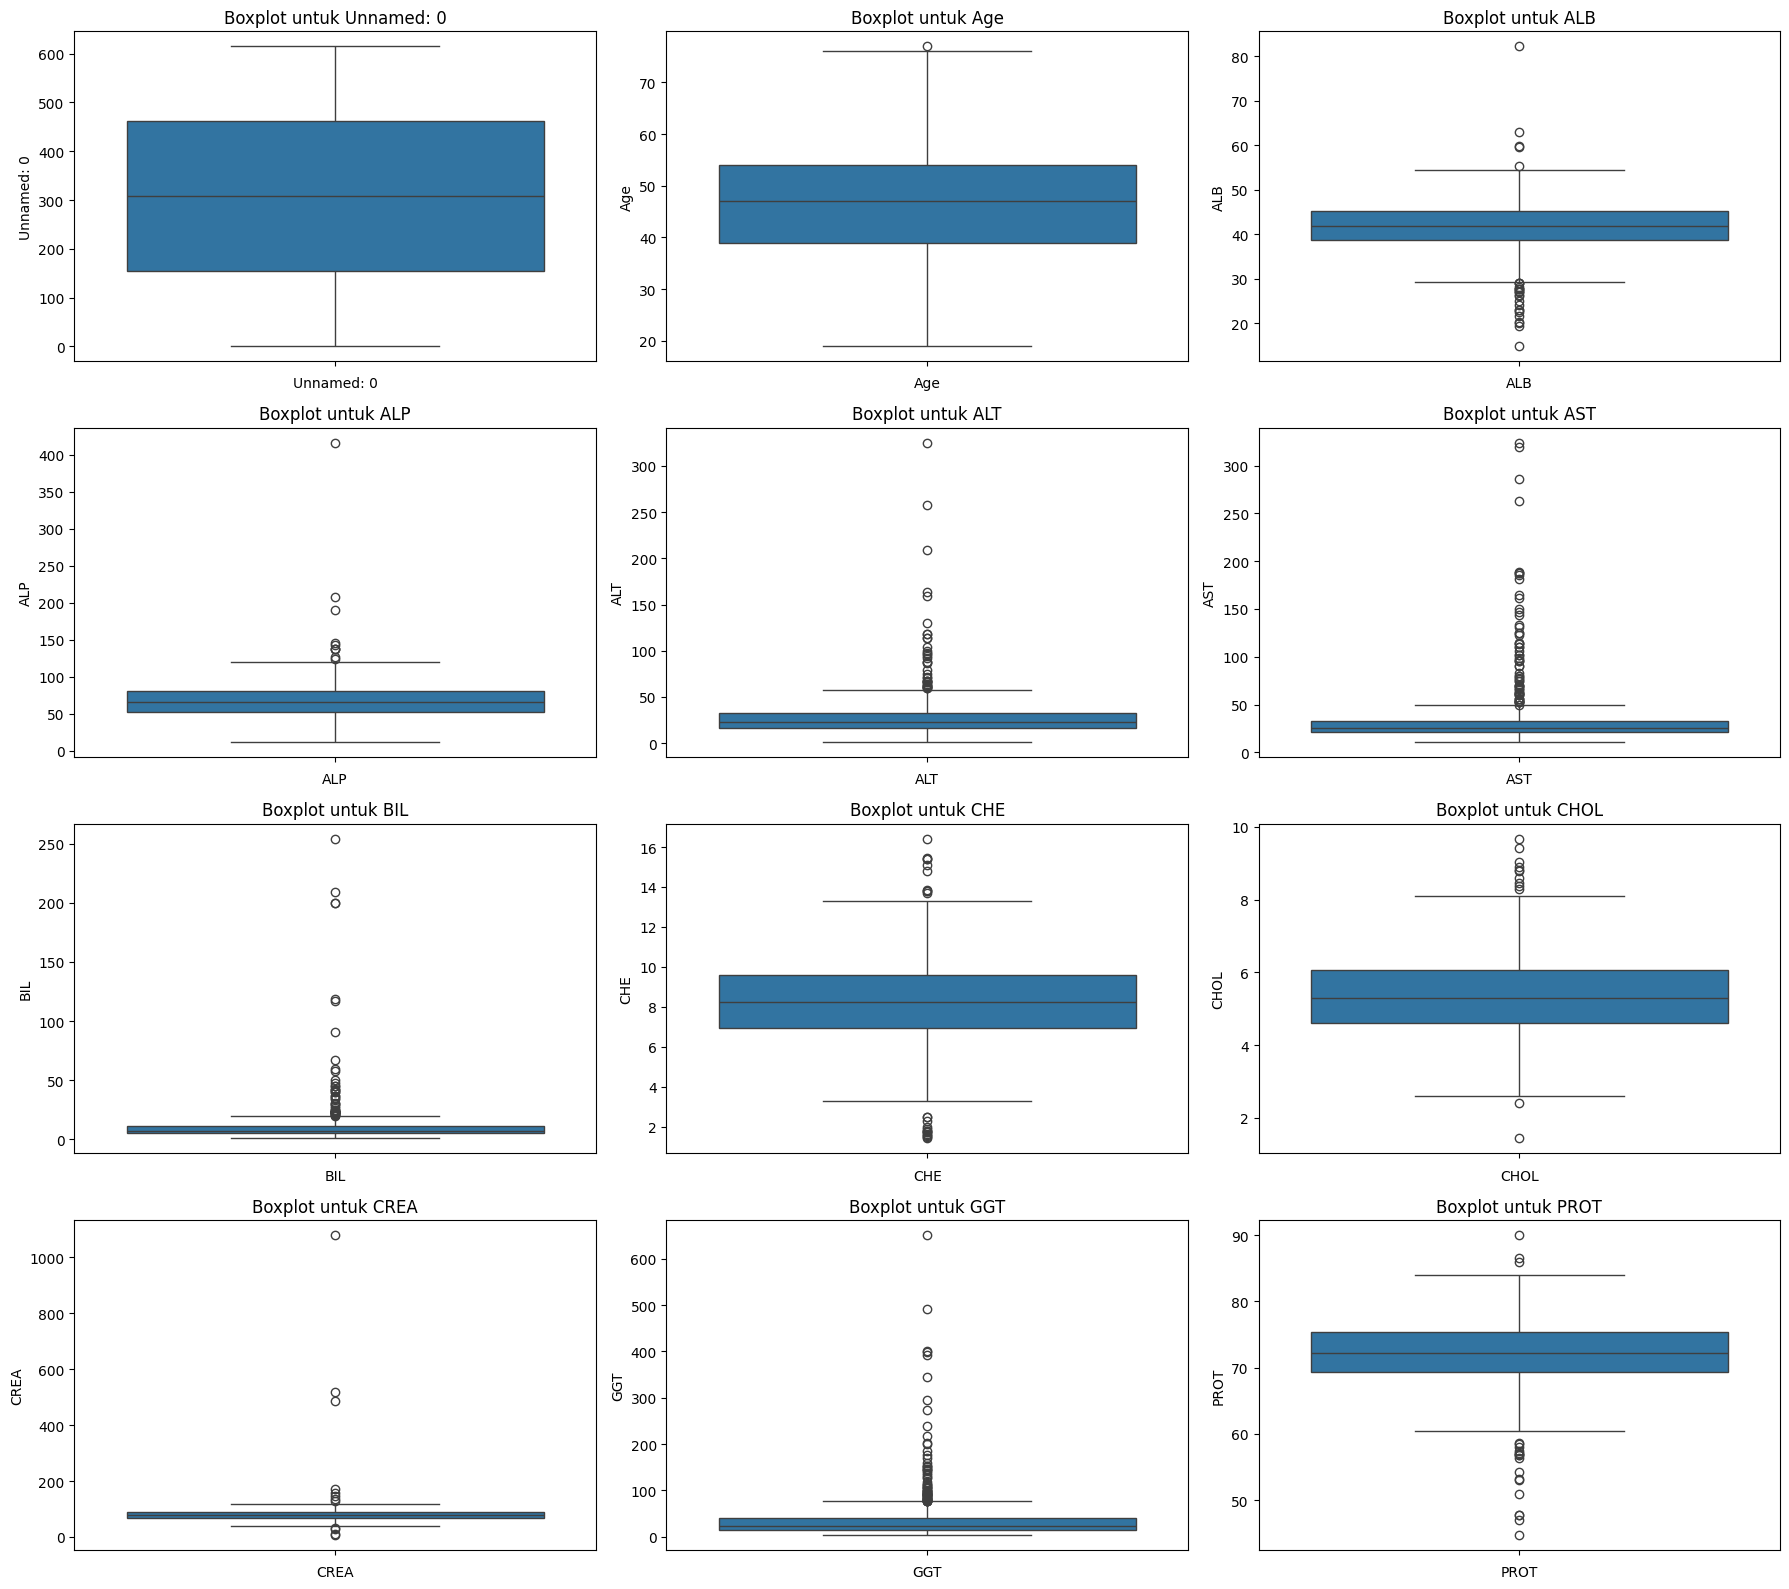

In [13]:
# Menyiapkan kolom yang akan dianalisis (semua kolom numerik)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Deteksi outlier dengan IQR (Interquartile Range)
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menentukan jumlah outlier untuk setiap kolom
outliers = ((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).sum()

# Menampilkan jumlah outlier per kolom
print("Jumlah Outlier per Kolom:")
print(outliers)

# Menentukan jumlah baris dan kolom untuk visualisasi (3 kolom)
n_cols = 3
n_rows = (len(numeric_columns) // n_cols) + (len(numeric_columns) % n_cols > 0)  # Menyesuaikan jumlah baris

# Set canvas ukuran untuk visualisasi
plt.figure(figsize=(n_cols * 6, n_rows * 4))  # Menyesuaikan ukuran figure

# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Membuat grid dengan jumlah baris dan kolom yang disesuaikan
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot untuk {col}")
    plt.xlabel(col)

# Menampilkan plot
plt.tight_layout()
plt.show()

- Berdasarkan hasil dari perhitungan outlier dengan menggunakan metode Interquartile Range (IQR), terlihat bahwa hanya ada satu kolom yang tidak ditemukan adanya outlier yaitu pada kolom "Unnamed: 0". Kolom lainnya (ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT) terlihat adanya outlier sehingga perlu untuk dilakukan penanganan outlier pada tahap selanjutnya.

# **Exploratory Data Analysis (EDA)**

Selanjutnya, akan dilakukan proses analisis data dengan teknik Univariate Analysis, Bivariate Analysis, dan Multivariate Analysis.

## **Univariate Analysis**

- **Analisis Distribusi Data Kategorikal**

In [14]:
# Mengelompokkan data menjadi 2 kategori yaitu normal (blood donor dan suspect blood donor) dan not normal (hepatitis, fibrosis, dan sirosis)
df['Category'] = df['Category'].map({'0=Blood Donor': 'Normal',
                                         '0s=suspect Blood Donor': 'Normal',
                                         "1=Hepatitis" : 'Abnormal',
                                         "2=Fibrosis" : 'Abnormal',
                                         "3=Cirrhosis" : 'Abnormal'})

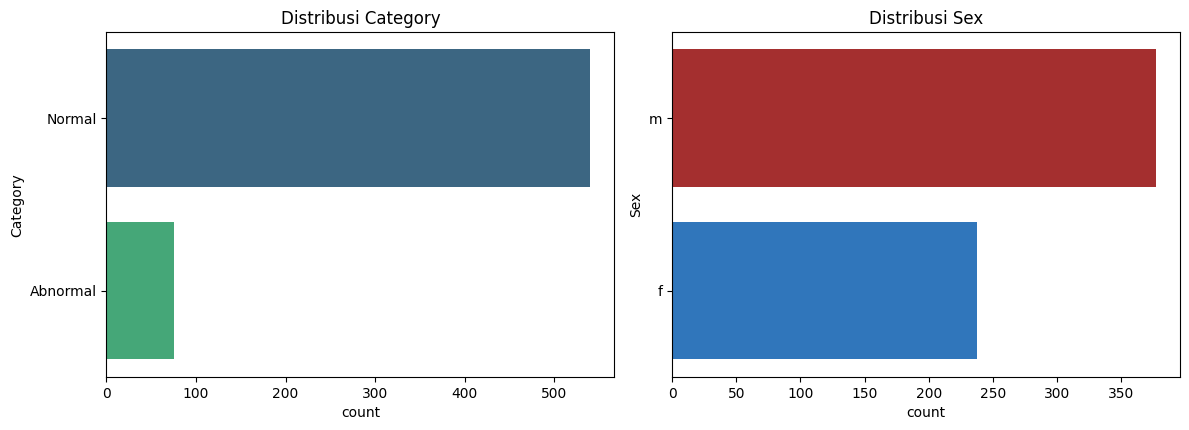

In [15]:
# Pilih kolom kategorikal yang akan dianalisis
categorical_columns = ['Category', 'Sex']

# Set plot size
plt.figure(figsize=(12, 8))

# Buat bar plot horizontal untuk setiap variabel kategorikal
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    if col == 'Category':
        # Plot untuk Gender dengan warna yang berbeda
        sns.countplot(data=df, y=col, palette='viridis', order=df[col].value_counts().index, hue='Category')
    else:
        # Plot untuk Result dengan warna yang berbeda
        sns.countplot(data=df, y=col, palette=['#B71C1C', '#1976D2'], order=df[col].value_counts().index, hue='Sex')

    plt.title(f"Distribusi {col}")

# Menampilkan plot
plt.tight_layout()
plt.show()


Dari hasil diatas, dapat dilihat bahwa terdapat lebih banyak individu berjenis kelamin Male (laki-laki) daripada Female (perempuan), dimana jumlah male yang jauh lebih dominan. Sedangkan, distribusi Category menunjukkan bahwa kategori normal (individu yang sehat) jauh lebih dominan dibandingkan dengan kategori abnormal (individu yang memiliki penyakit hati seperti hepatitis, fibrosis, dan sirosis). Hal ini mengindikasikan bahwa jumlah individu yang memiliki penyakit hepatitis, sirosis, dan fibrosis jauh lebih sedikit.

- **Analisis Distribusi Data Numerik**

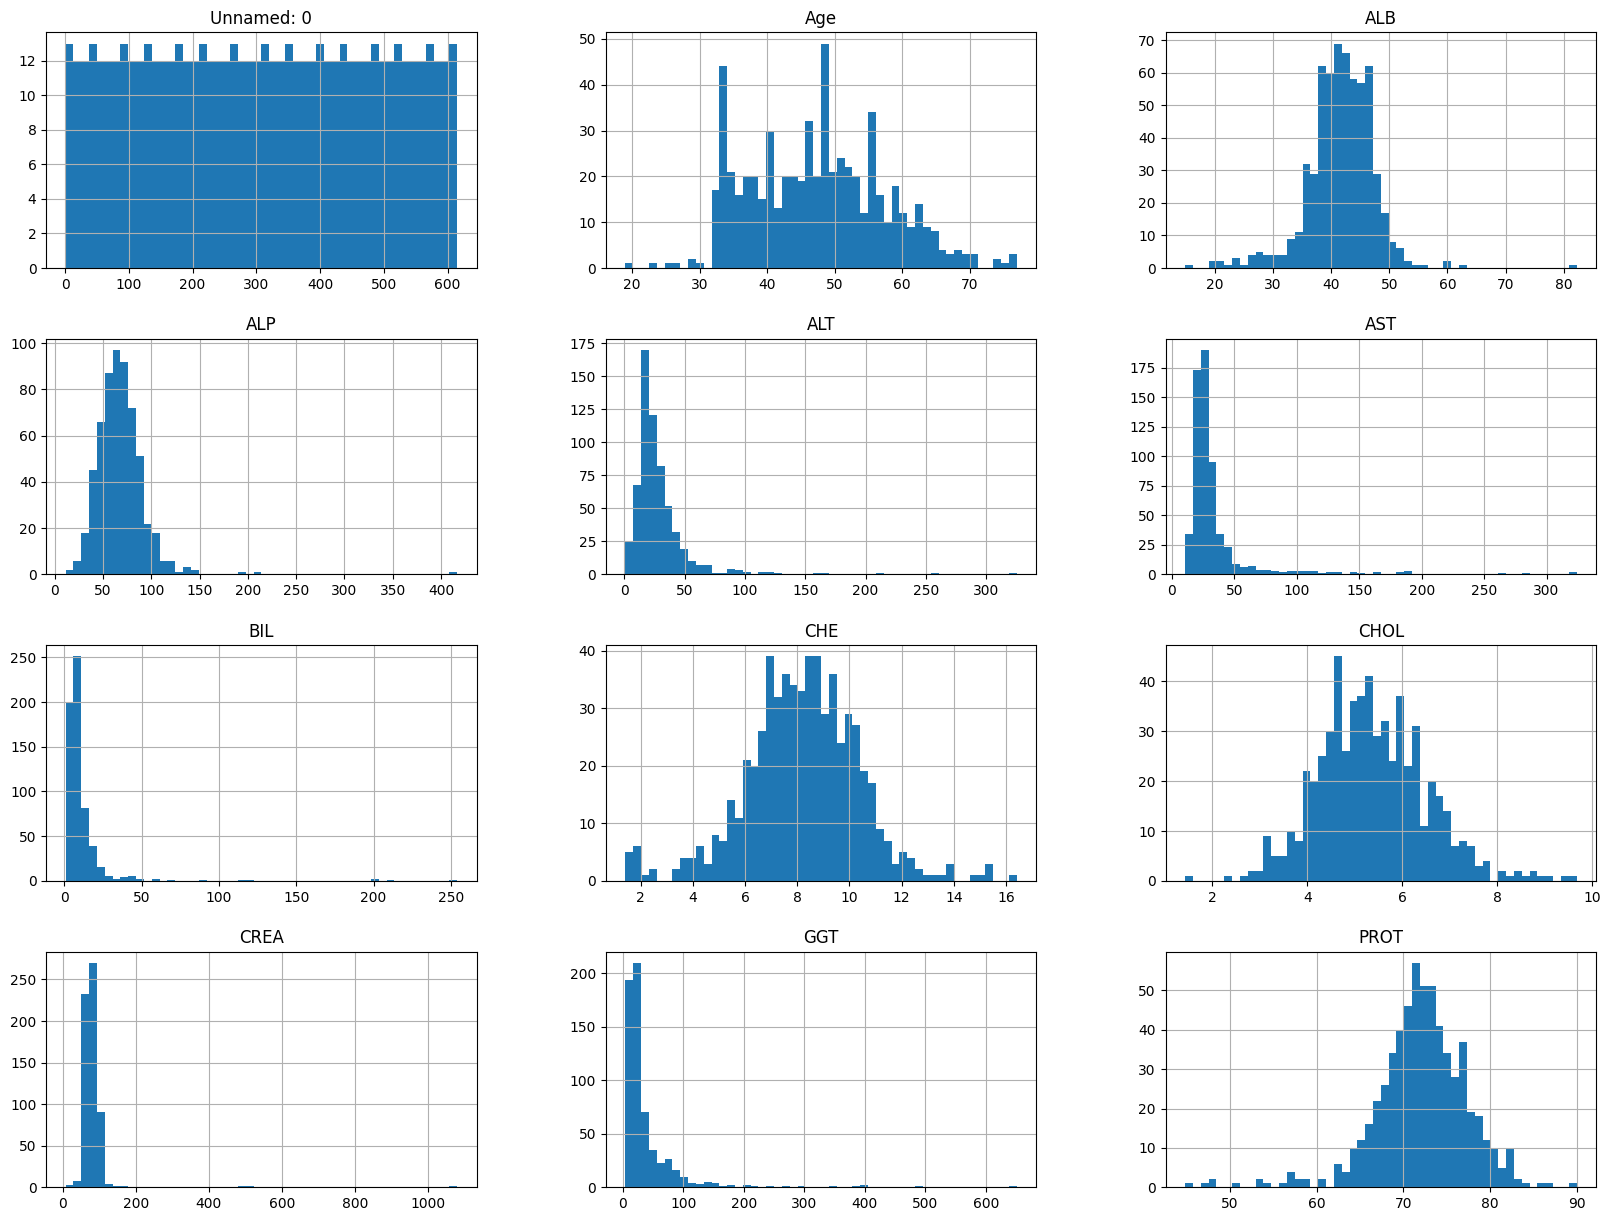

In [16]:
# Menyiapkan kolom yang akan dianalisis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_columns].hist(bins=50, figsize=(20,15))
plt.show()

Berdasarkan grafik histogram dari fitur numerik dalam dataset Hepatitis C, berikut adalah beberapa informasi yang diperoleh:

1. **Distribusi Usia (Age):** Data usia pasien tersebar dalam rentang 20–80 tahun, dengan konsentrasi tertinggi pada usia 30–50 tahun. Distribusi ini menunjukkan bahwa kebanyakan pasien berada pada usia produktif hingga menjelang lansia.

2. **Distribusi Fitur Klinis:**

   * **ALB, CHE, CHOL, dan PROT** menunjukkan distribusi yang relatif mendekati normal, dengan bentuk simetris dan puncak yang jelas di tengah rentang data. Ini mengindikasikan variasi nilai yang cukup stabil dalam populasi pasien.
   * **ALP, ALT, AST, BIL, GGT, dan CREA** memiliki distribusi **miring ke kanan (right-skewed)**, menunjukkan adanya **nilai-nilai ekstrem (outliers)** di sisi kanan grafik. Ini umum terjadi pada data medis karena kondisi abnormal biasanya menghasilkan lonjakan nilai.
   * **GGT dan AST** menunjukkan rentang nilai yang sangat lebar, mengindikasikan bahwa fitur ini mungkin sensitif terhadap kondisi patologis yang berat.

3. **Outliers dan Skewness:**
   Banyak fitur seperti **ALT, AST, BIL, GGT, dan CREA** memperlihatkan skewness tinggi dan rentang nilai yang luas. Hal ini mengindikasikan perlunya transformasi atau penanganan outlier untuk meningkatkan performa model prediktif.

4. **Fitur `Unnamed: 0`:** Histogram fitur ini merata dan tidak memiliki arti informatif. Untuk fitur ini akan dihapus pada tahap data preparation karena tidak diperlukan.

**Kesimpulan Umum:**
Sebagian besar fitur medis memiliki distribusi skewed, dimana fitur-fitur dengan distribusi normal (seperti CHE dan PROT) menunjukkan kestabilan dan bisa menjadi indikator tambahan yang berguna dalam pemodelan. Sementara itu, fitur dengan distribusi miring dan outlier tinggi (seperti GGT dan AST) dapat menjadi sinyal penting untuk mengidentifikasi kondisi abnormal seperti Hepatitis C.

## **Bivariate Analysis**

**Hubungan antara fitur-fitur terhadap fitur target (Category)**

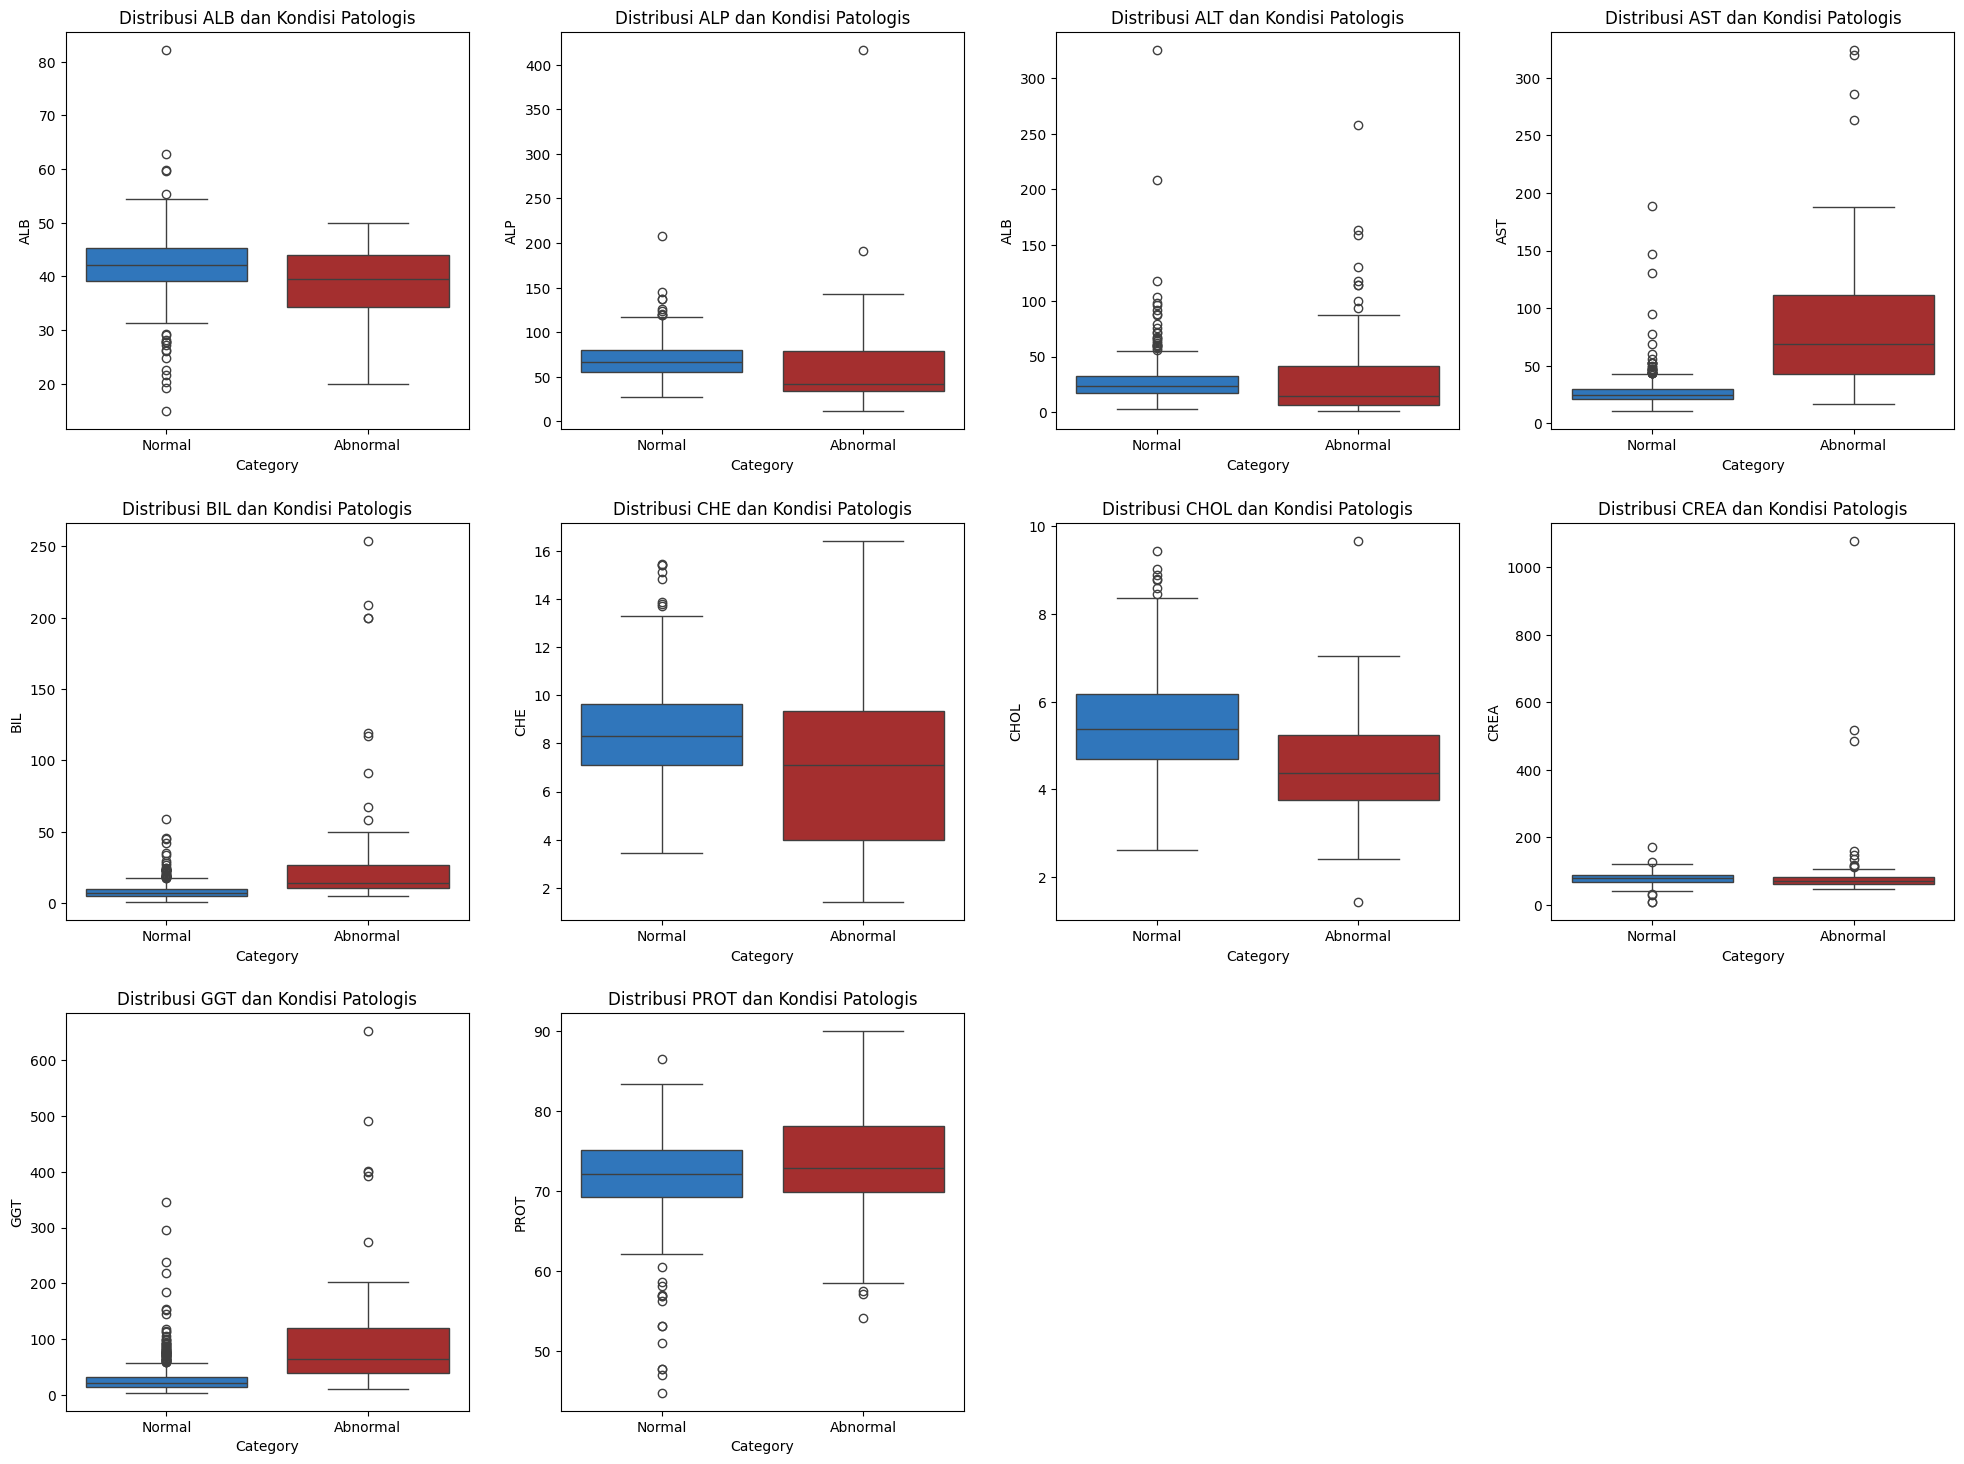

In [17]:
# Set ukuran canvas untuk 1 baris, 4 kolom, 4 plot
plt.figure(figsize=(20, 15))

# Plot untuk ALB
plt.subplot(3, 4, 1)  # 1 baris, 4 kolom, plot pertama
sns.boxplot(data=df, x='Category', y='ALB', hue='Category', palette={'Normal': '#1976D2', 'Abnormal': '#B71C1C'})
plt.title('Distribusi ALB dan Kondisi Patologis')
plt.xlabel('Category')
plt.ylabel('ALB')

# Plot untuk ALP
plt.subplot(3, 4, 2)  # 1 baris, 4 kolom, plot pertama
sns.boxplot(data=df, x='Category', y='ALP', hue='Category', palette={'Normal': '#1976D2', 'Abnormal': '#B71C1C'})
plt.title('Distribusi ALP dan Kondisi Patologis')
plt.xlabel('Category')
plt.ylabel('ALP')

# Plot untuk ALT
plt.subplot(3, 4, 3)  # 1 baris, 4 kolom, plot pertama
sns.boxplot(data=df, x='Category', y='ALT', hue='Category', palette={'Normal': '#1976D2', 'Abnormal': '#B71C1C'})
plt.title('Distribusi ALT dan Kondisi Patologis')
plt.xlabel('Category')
plt.ylabel('ALB')

# Plot untuk AST
plt.subplot(3, 4, 4)  # 1 baris, 4 kolom, plot pertama
sns.boxplot(data=df, x='Category', y='AST', hue='Category', palette={'Normal': '#1976D2', 'Abnormal': '#B71C1C'})
plt.title('Distribusi AST dan Kondisi Patologis')
plt.xlabel('Category')
plt.ylabel('AST')

# Plot untuk BIL
plt.subplot(3, 4, 5)  # 1 baris, 4 kolom, plot pertama
sns.boxplot(data=df, x='Category', y='BIL', hue='Category', palette={'Normal': '#1976D2', 'Abnormal': '#B71C1C'})
plt.title('Distribusi BIL dan Kondisi Patologis')
plt.xlabel('Category')
plt.ylabel('BIL')

# Plot untuk CHE
plt.subplot(3, 4, 6)  # 1 baris, 4 kolom, plot pertama
sns.boxplot(data=df, x='Category', y='CHE', hue='Category', palette={'Normal': '#1976D2', 'Abnormal': '#B71C1C'})
plt.title('Distribusi CHE dan Kondisi Patologis')
plt.xlabel('Category')
plt.ylabel('CHE')

# Plot untuk CHOL
plt.subplot(3, 4, 7)  # 1 baris, 4 kolom, plot pertama
sns.boxplot(data=df, x='Category', y='CHOL', hue='Category', palette={'Normal': '#1976D2', 'Abnormal': '#B71C1C'})
plt.title('Distribusi CHOL dan Kondisi Patologis')
plt.xlabel('Category')
plt.ylabel('CHOL')

# Plot untuk CREA
plt.subplot(3, 4, 8)  # 1 baris, 4 kolom, plot pertama
sns.boxplot(data=df, x='Category', y='CREA', hue='Category', palette={'Normal': '#1976D2', 'Abnormal': '#B71C1C'})
plt.title('Distribusi CREA dan Kondisi Patologis')
plt.xlabel('Category')
plt.ylabel('CREA')

# Plot untuk GGT
plt.subplot(3, 4, 9)  # 1 baris, 4 kolom, plot pertama
sns.boxplot(data=df, x='Category', y='GGT', hue='Category', palette={'Normal': '#1976D2', 'Abnormal': '#B71C1C'})
plt.title('Distribusi GGT dan Kondisi Patologis')
plt.xlabel('Category')
plt.ylabel('GGT')

# Plot untuk PROT
plt.subplot(3, 4, 10)  # 1 baris, 4 kolom, plot pertama
sns.boxplot(data=df, x='Category', y='PROT', hue='Category', palette={'Normal': '#1976D2', 'Abnormal': '#B71C1C'})
plt.title('Distribusi PROT dan Kondisi Patologis')
plt.xlabel('Category')
plt.ylabel('PROT')

# Menyesuaikan layout
plt.tight_layout(pad=2.0)  # Adjust padding between subplots
plt.show()

1. **ALB (Albumin)**:

   * **Distribusi**: ALB pada kategori Normal memiliki median yang lebih tinggi daripada Abnormal, dengan rentang nilai lebih besar.
   * **Outlier**: Terdapat beberapa outlier pada kedua kategori, yang menunjukkan adanya individu dengan nilai ALB yang sangat rendah atau sangat tinggi.
   * **Variabilitas**: Rentang interkuartil (IQR) cukup sempit, menunjukkan sebagian besar data berada dalam rentang yang stabil.

2. **ALP (Alkaline Phosphatase)**:

   * **Distribusi**: Nilai ALP pada kategori Abnormal secara umum lebih tinggi daripada Normal.
   * **Outlier**: Ada banyak outlier pada kategori Abnormal, terutama di nilai yang sangat tinggi, mengindikasikan adanya variabilitas tinggi pada data ini.
   * **Variabilitas**: Kategori Abnormal memiliki IQR yang lebih lebar, menunjukkan distribusi data lebih menyebar dibandingkan Normal.

3. **ALT (Alanine Transaminase)**:

   * **Distribusi**: Median ALT lebih tinggi pada kategori Abnormal.
   * **Outlier**: Banyak outlier pada kedua kategori, terutama di nilai tinggi pada Abnormal.
   * **Variabilitas**: Abnormal memiliki rentang distribusi yang jauh lebih lebar dibandingkan Normal.

4. **AST (Aspartate Transaminase)**:

   * **Distribusi**: Nilai AST jauh lebih tinggi pada kategori Abnormal dibandingkan Normal.
   * **Outlier**: Banyak outlier pada kategori Abnormal, tetapi ini dapat menjadi indikasi penting dalam membedakan kondisi.
   * **Variabilitas**: Rentang distribusi sangat lebar pada Abnormal, sementara Normal cenderung lebih terkonsentrasi.

5. **BIL (Bilirubin)**:

   * **Distribusi**: Nilai BIL pada kategori Abnormal jauh lebih tinggi dibandingkan Normal.
   * **Outlier**: Sangat banyak outlier pada kategori Normal, yang menunjukkan beberapa individu memiliki nilai abnormal meskipun tergolong Normal.
   * **Variabilitas**: Abnormal memiliki distribusi yang lebih terpusat dibandingkan Normal.

6. **CHE (Cholinesterase)**:

   * **Distribusi**: Perbedaan antara kategori Normal dan Abnormal kurang signifikan.
   * **Outlier**: Beberapa outlier pada kategori Normal dengan nilai sangat tinggi.
   * **Variabilitas**: Distribusi pada kedua kategori cukup tumpang tindih.

7. **CHOL (Cholesterol)**:

   * **Distribusi**: CHOL pada kategori Normal cenderung lebih tinggi daripada Abnormal, tetapi perbedaan kecil.
   * **Outlier**: Ada beberapa outlier, terutama pada kategori Normal.
   * **Variabilitas**: Rentang distribusi data cukup seragam pada kedua kategori.

8. **CREA (Creatinine)**:

   * **Distribusi**: Distribusi CREA hampir sama antara Normal dan Abnormal.
   * **Outlier**: Beberapa outlier pada kedua kategori, terutama di nilai tinggi.
   * **Variabilitas**: Rentang distribusi cukup sempit, menunjukkan data ini kurang variabel.

9. **GGT (Gamma-Glutamyl Transferase)**:

   * **Distribusi**: Nilai GGT pada kategori Abnormal jauh lebih tinggi daripada Normal.
   * **Outlier**: Banyak outlier pada kategori Abnormal, mengindikasikan adanya individu dengan nilai GGT yang sangat tinggi.
   * **Variabilitas**: Rentang distribusi sangat lebar pada Abnormal.

10. **PROT (Protein Total)**:

    * **Distribusi**: PROT sedikit lebih tinggi pada Abnormal dibandingkan Normal, tetapi distribusinya cukup tumpang tindih.
    * **Outlier**: Beberapa outlier di kedua kategori, tetapi jumlahnya tidak terlalu banyak.
    * **Variabilitas**: IQR pada kedua kategori relatif serupa.

### Kesimpulan
Fitur-fitur yang paling relevan untuk memprediksi kondisi (Normal atau Abnormal) berdasarkan visualisasi yaitu **BIL**, **AST**, **ALP**, **ALT**, dan **GGT** yang mana memiliki rentang distribusi yang berbeda jelas dan adanya outlier pada Abnormal. Hal ini memperkuat relevansi fitur tersebut untuk prediksi. Sedangkan fitur CHE dan CREA tampaknya kurang relevan karena distribusi antara kategori Normal dan Abnormal cenderung mirip.

## **Multivariate Analysis**

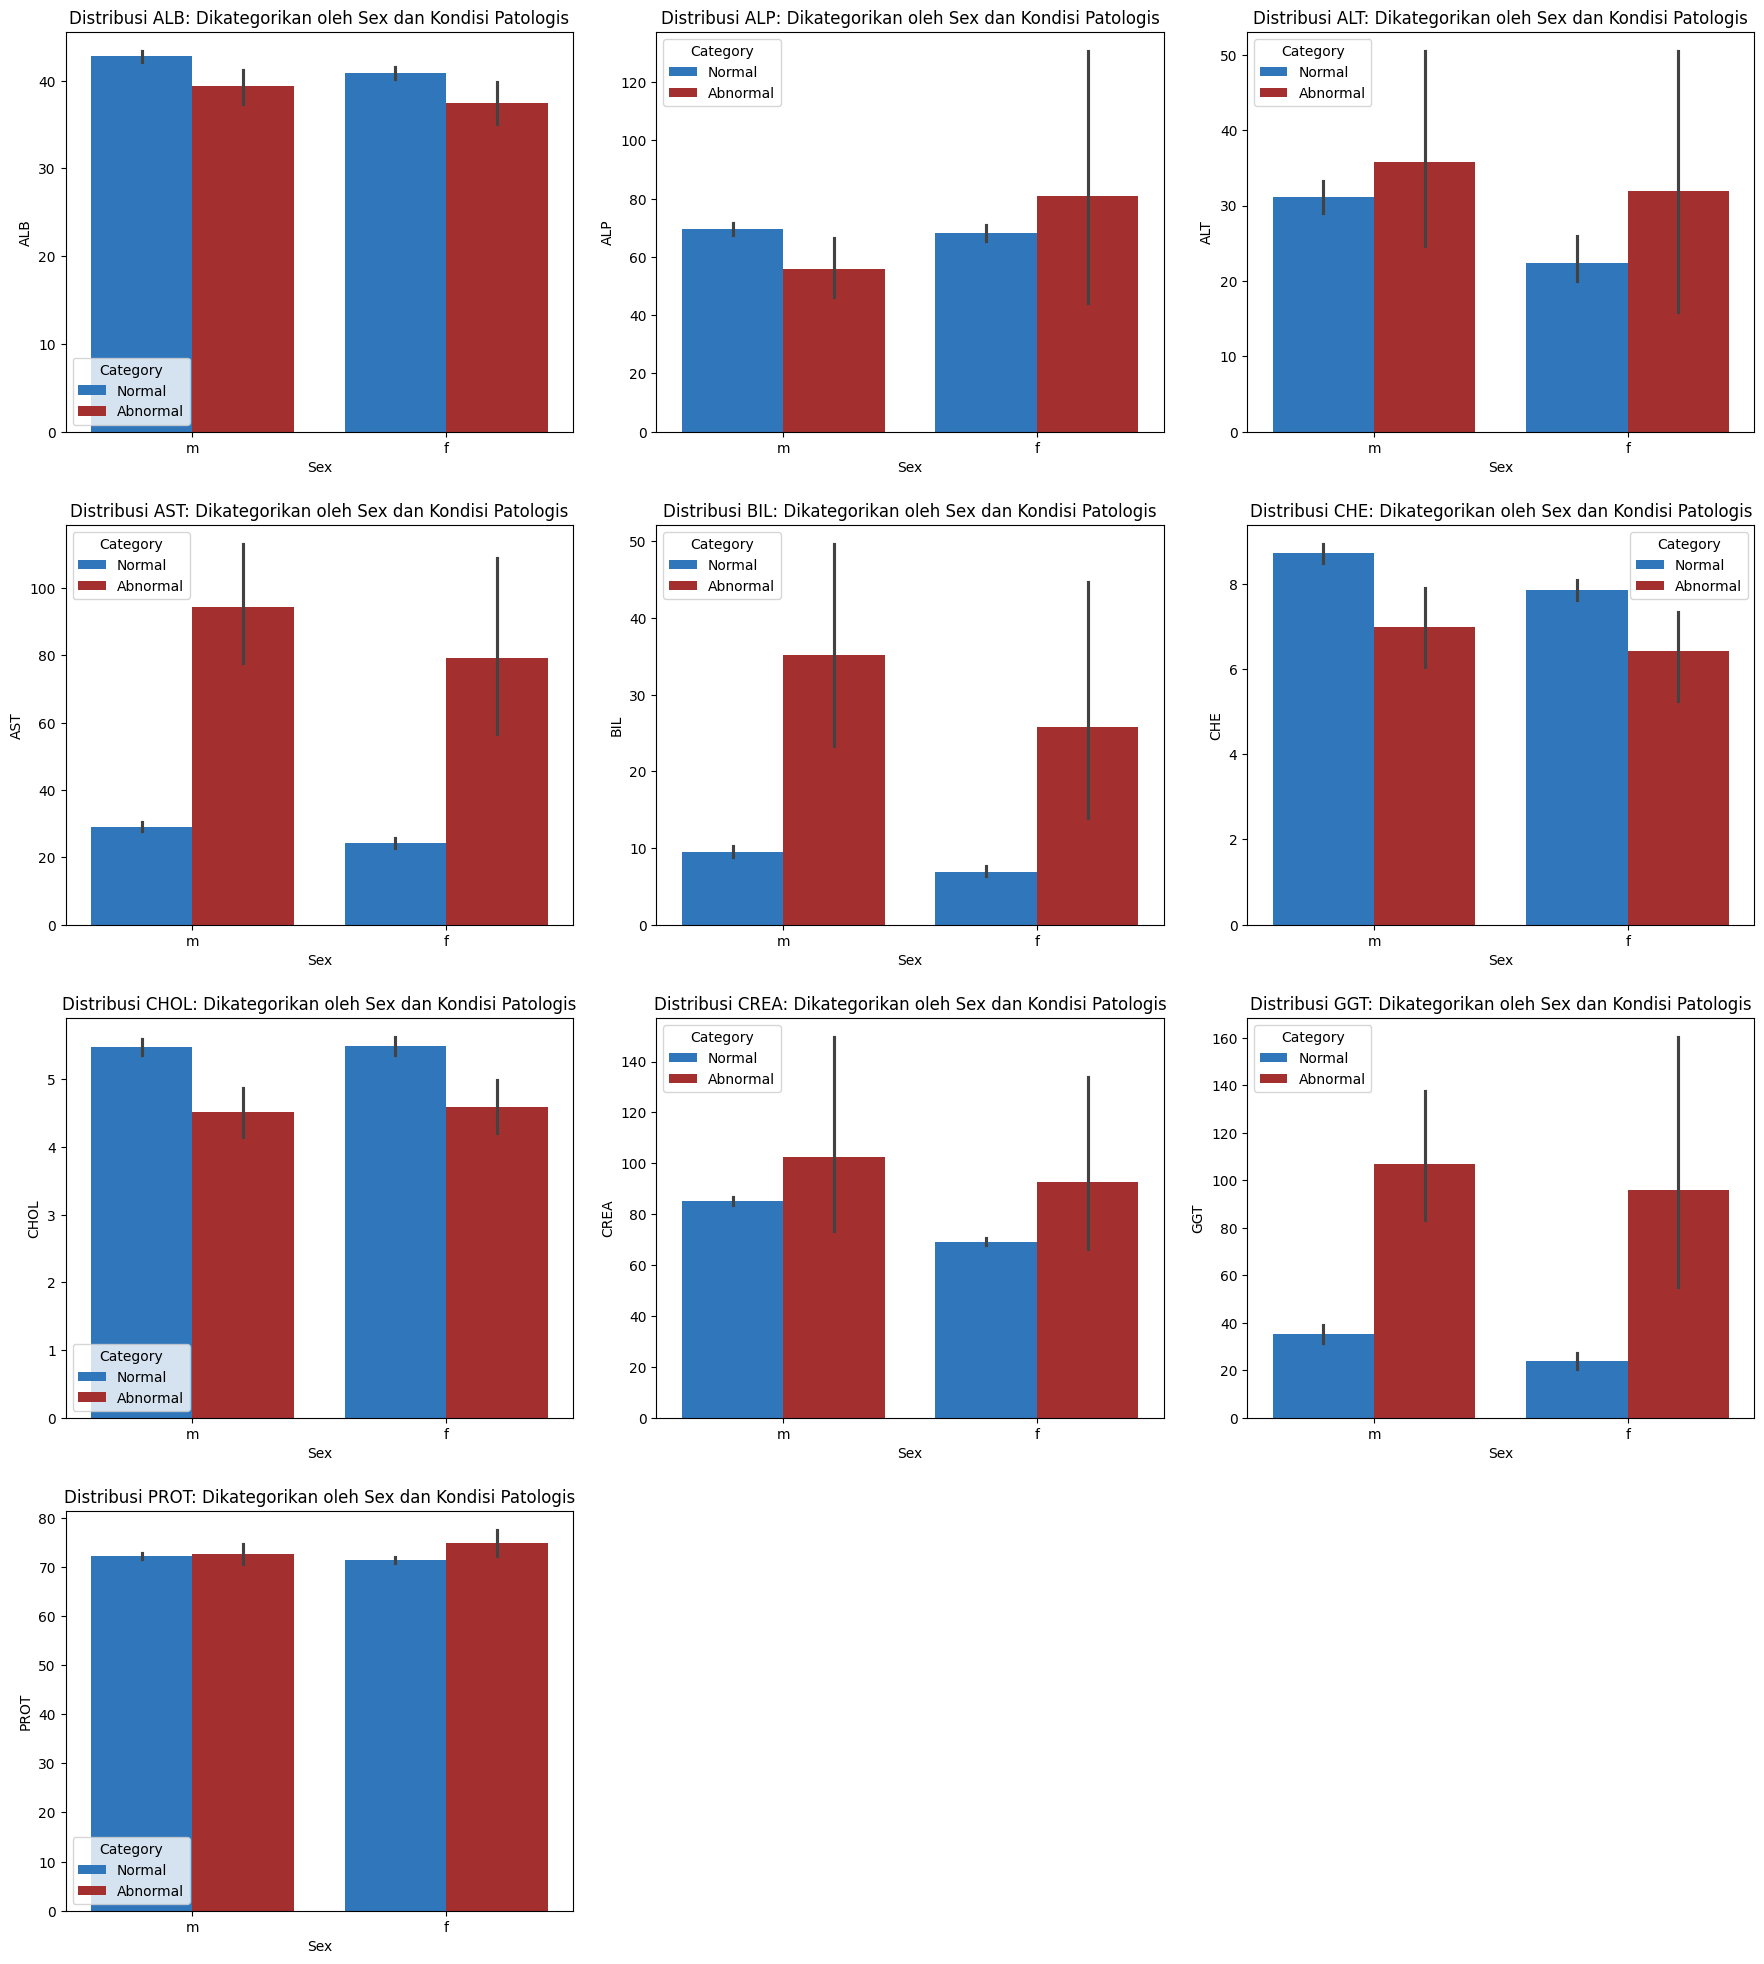

In [18]:
# Mengamati hubungan antar fitur numerik dengan fungsi barplot() dikategorikan berdasarkan Sex dan Category
patologis_cols = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Determine the number of rows and columns for the subplots
n_cols = 3
n_rows = (len(patologis_cols) // n_cols) + (len(patologis_cols) % n_cols > 0)

plt.figure(figsize=(n_cols * 6, n_rows * 5)) # Adjust figure size

for i, col in enumerate(patologis_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.barplot(
        data=df,
        x='Sex',        # Kategorik 1
        y=col,          # Numerik (single column at a time)
        hue='Category', # Kategorik 2
        palette={'Normal': '#1976D2', 'Abnormal': '#B71C1C'}
    )
    plt.title(f'Distribusi {col}: Dikategorikan oleh Sex dan Kondisi Patologis')
    plt.xlabel('Sex')
    plt.ylabel(col)
    plt.legend(title='Category')

plt.tight_layout(pad=2.0)  # Adjust padding
plt.show()

### **1. ALB (Albumin):**
  * Tidak ada perbedaan mencolok antara laki-laki (m) dan perempuan (f) dalam kategori normal maupun abnormal. Perbedaan antara kategori normal dan abnormal hampir tidak terlihat.
  * ALB cenderung seragam di semua kategori, baik berdasarkan jenis kelamin maupun kondisi patologis.

### **2. ALP (Alkaline Phosphatase):**
  * Tidak ada perbedaan signifikan antara laki-laki dan perempuan. Sedangkan perbedaan antara kategori normal dan abnormal sangat kecil.
  * ALP juga menunjukkan distribusi yang seragam tanpa perbedaan signifikan.

### **3. ALT (Alanine Transaminase):**
  * Nilai ALT pada laki-laki sedikit lebih tinggi dibanding perempuan, terutama pada kategori abnormal.
  * Ada peningkatan nilai ALT pada kategori abnormal dibanding kategori normal, tetapi tidak signifikan.
  * ALT sedikit berbeda pada laki-laki dengan kategori abnormal, tetapi perbedaan tidak mencolok.

### **4. AST (Aspartate Transaminase):**
  * Perbedaan terlihat jelas, terutama pada laki-laki, dengan kategori abnormal lebih tinggi dibanding kategori normal.
  * Perbedaan antara normal dan abnormal cukup besar, menunjukkan relevansi AST sebagai indikator kondisi patologis.
  * AST menjadi salah satu parameter yang paling relevan dalam membedakan kondisi patologis.

### **5. BIL (Bilirubin):**
  * Nilai pada perempuan sedikit lebih rendah dibanding laki-laki, terutama pada kategori abnormal.
  * Nilai kategori abnormal secara signifikan lebih tinggi dibanding kategori normal.
  * BIL merupakan salah satu parameter yang menunjukkan perbedaan cukup signifikan antara kategori normal dan abnormal.

### **6. CHE (Cholinesterase):**
  * Nilai kategori normal pada laki-laki sedikit lebih tinggi dibanding perempuan.
  * Perbedaan antara kategori normal dan abnormal terlihat cukup jelas namun tidak terlalu mencolok terkait kondisi patologis dan jenis kelamin.

### **7. CHOL (Cholesterol):**
  * Tidak ada perbedaan yang signifikan antara jenis kelamin. Dan distribusi CHOL relatif seragam antara kategori normal dan abnormal.
  * CHOL tidak menunjukkan perbedaan mencolok terkait kondisi patologis atau jenis kelamin.

### **8. CREA (Creatinine):**
  * Laki-laki menunjukkan nilai yang sedikit lebih tinggi dibanding perempuan pada kedua kategori (normal dan abnormal). Perbedaan antara kategori normal dan abnormal tidak signifikan.

### **9. GGT (Gamma-Glutamyl Transferase):**
  * Laki-laki menunjukkan nilai yang lebih tinggi dibanding perempuan, terutama pada kategori abnormal.
  * Perbedaan signifikan terlihat antara kategori normal dan abnormal pada kedua jenis kelamin.
  * GGT menjadi salah satu parameter yang paling menonjol dalam membedakan kategori normal dan abnormal.

### **10. PROT (Protein):**
  * Nilai cenderung seragam untuk laki-laki dan perempuan. Tidak ada perbedaan signifikan antara kategori normal dan abnormal.
  * PROT relatif homogen di semua kategori.

### **Kesimpulan:**
* Parameter **AST**, **BIL**, dan **GGT** menjadi yang paling relevan untuk membedakan kategori normal dan abnormal.
* Parameter seperti **ALB**, **ALP**, **CHE**, **CHOL**, **CREA**, dan **PROT** tidak menunjukkan perbedaan mencolok, sehingga kurang relevan sebagai indikator kondisi patologis.

## **Kolerasi antar Fitur Numerik menggunakan fungsi pairplot()**

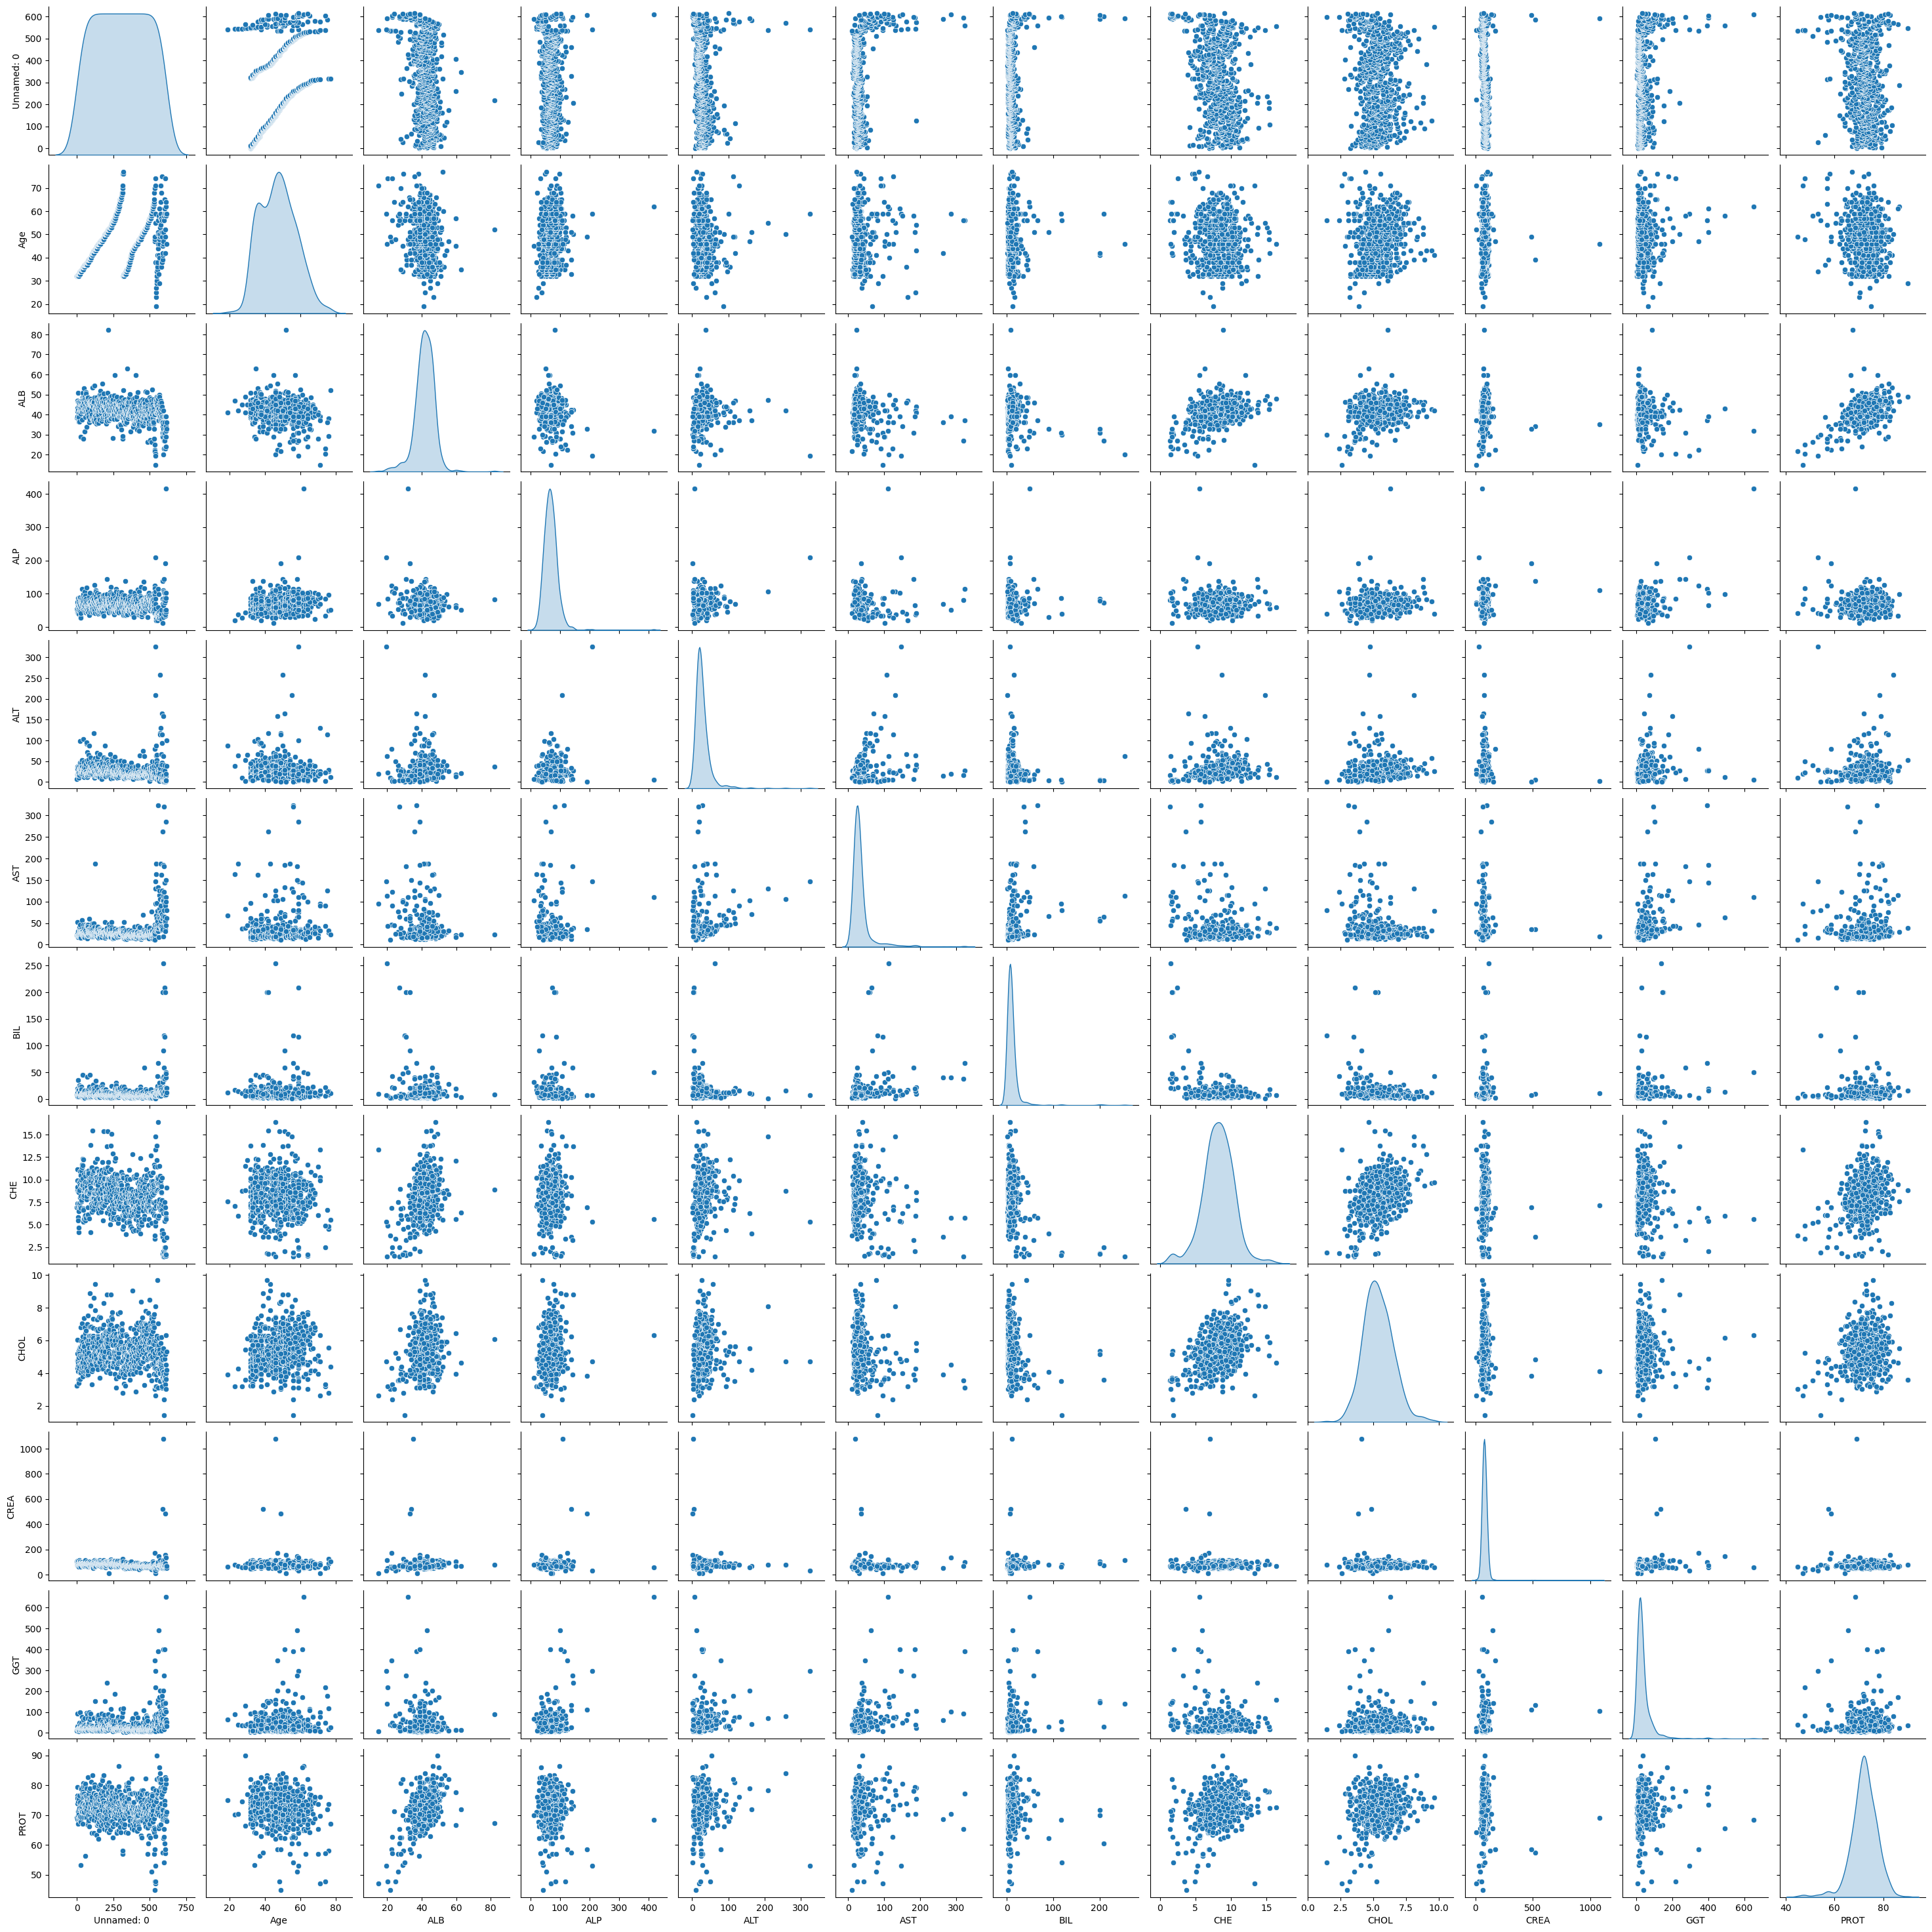

In [19]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

## **Kolerasi Fitur Numerik dengan Menggunakan Heatmap Correlation Matrix**

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

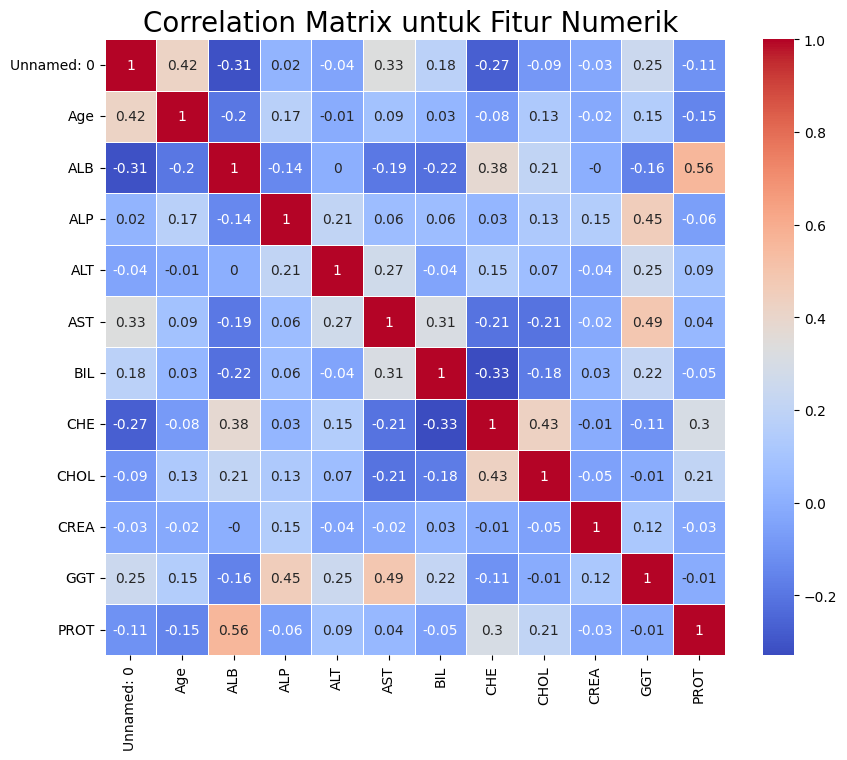

In [20]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_columns].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

- Terlihat adanya korelasi positif yang kuat yaitu pada ALB-PROT (0.56), GGT-ALP(0.45), CHE-CHOL (0.43), AST-BIL(0.31), ALT-AST (0.43), CHE-ALB (0.38), dan AST-GGT (0.49). Hal ini menunjukkan bahwa semakin tinggi kadar ALB maka semakin tinggi pula kadar PROT-nya, semakin tinggi kadar CHE maka kemungkinan semakin tinggi pula kadar CHOL-nya, serta semakin tinggi kadar AST maka kemungkinan semakin tinggi pula kadar ALT dan GGT-nya.
- Korelasi positif yang lemah terlihat beberapa diantaranya yaitu hubungan Age-GGT (0.15), ALP-CREA(0.15), ALT-PROT(0.09), ALT-CHOL(0.07), Age-AST (0.09), dan lainnya. Hal ini menunjukkan bahwa antar fitur memiliki hubungan namun tidak dominan.
- Korelasi negatif yang lemah terlihat pada BIL-CHE(-0.33), ini berarti jika ALB bertambah, maka kadar CHE cenderung turun sedikit.
- Korelasi 0 seperti pada ALB-ALT dan ALB-CREA menunjukkan tidak adanya hubungan diantara keduanya.

# **Data Preparation**

## **Drop Kolom yang Tidak Berguna**

Karena kolom Unnamed:0 tidak diperlukan dalam analisis pada tahap selanjutnya, maka kita perlu drop kolom tersebut.


In [21]:
# Menghapus kolom yang tidak diperlukan
df=df.drop(['Unnamed: 0'],axis=1)

## **Penanganan Missing Value**

In [22]:
# Mengisi missing value dengan nilai mean
def fill_selected_missing_with_mean(df, columns):
    for col in columns:
        df[col] = df[col].fillna(df[col].mean())
    return df

selected_columns = ['ALB', 'ALP', 'ALT', 'CHOL', 'PROT']
df = fill_selected_missing_with_mean(df, selected_columns)
print(df.isnull().sum())

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


Terlihat bahwa missing value sudah berhasil diatasi.

## **Penanganan Outlier**

In [23]:
# Daftar kolom yang akan diproses
columns_to_winsorize = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

for col in columns_to_winsorize:
    # Hitung batas IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR

    # Terapkan winsorization
    df.loc[df[col] > upper, col] = upper  # Ganti outlier atas
    df.loc[df[col] < lower, col] = lower  # Ganti outlier bawah

# Verifikasi
print("Jumlah outlier yang ditangani per kolom:")
for col in columns_to_winsorize:
    original_count = len(df) - df[col].between(lower, upper).sum()
    print(f"{col}: {original_count} nilai di luar batas IQR")

Jumlah outlier yang ditangani per kolom:
ALB: 615 nilai di luar batas IQR
ALP: 335 nilai di luar batas IQR
ALT: 615 nilai di luar batas IQR
AST: 615 nilai di luar batas IQR
BIL: 615 nilai di luar batas IQR
CHE: 615 nilai di luar batas IQR
CHOL: 615 nilai di luar batas IQR
CREA: 258 nilai di luar batas IQR
GGT: 517 nilai di luar batas IQR
PROT: 0 nilai di luar batas IQR


Jumlah Outlier per Kolom:
ALB     0
ALP     0
ALT     0
AST     0
BIL     0
CHE     0
CHOL    0
CREA    0
GGT     0
PROT    0
dtype: int64


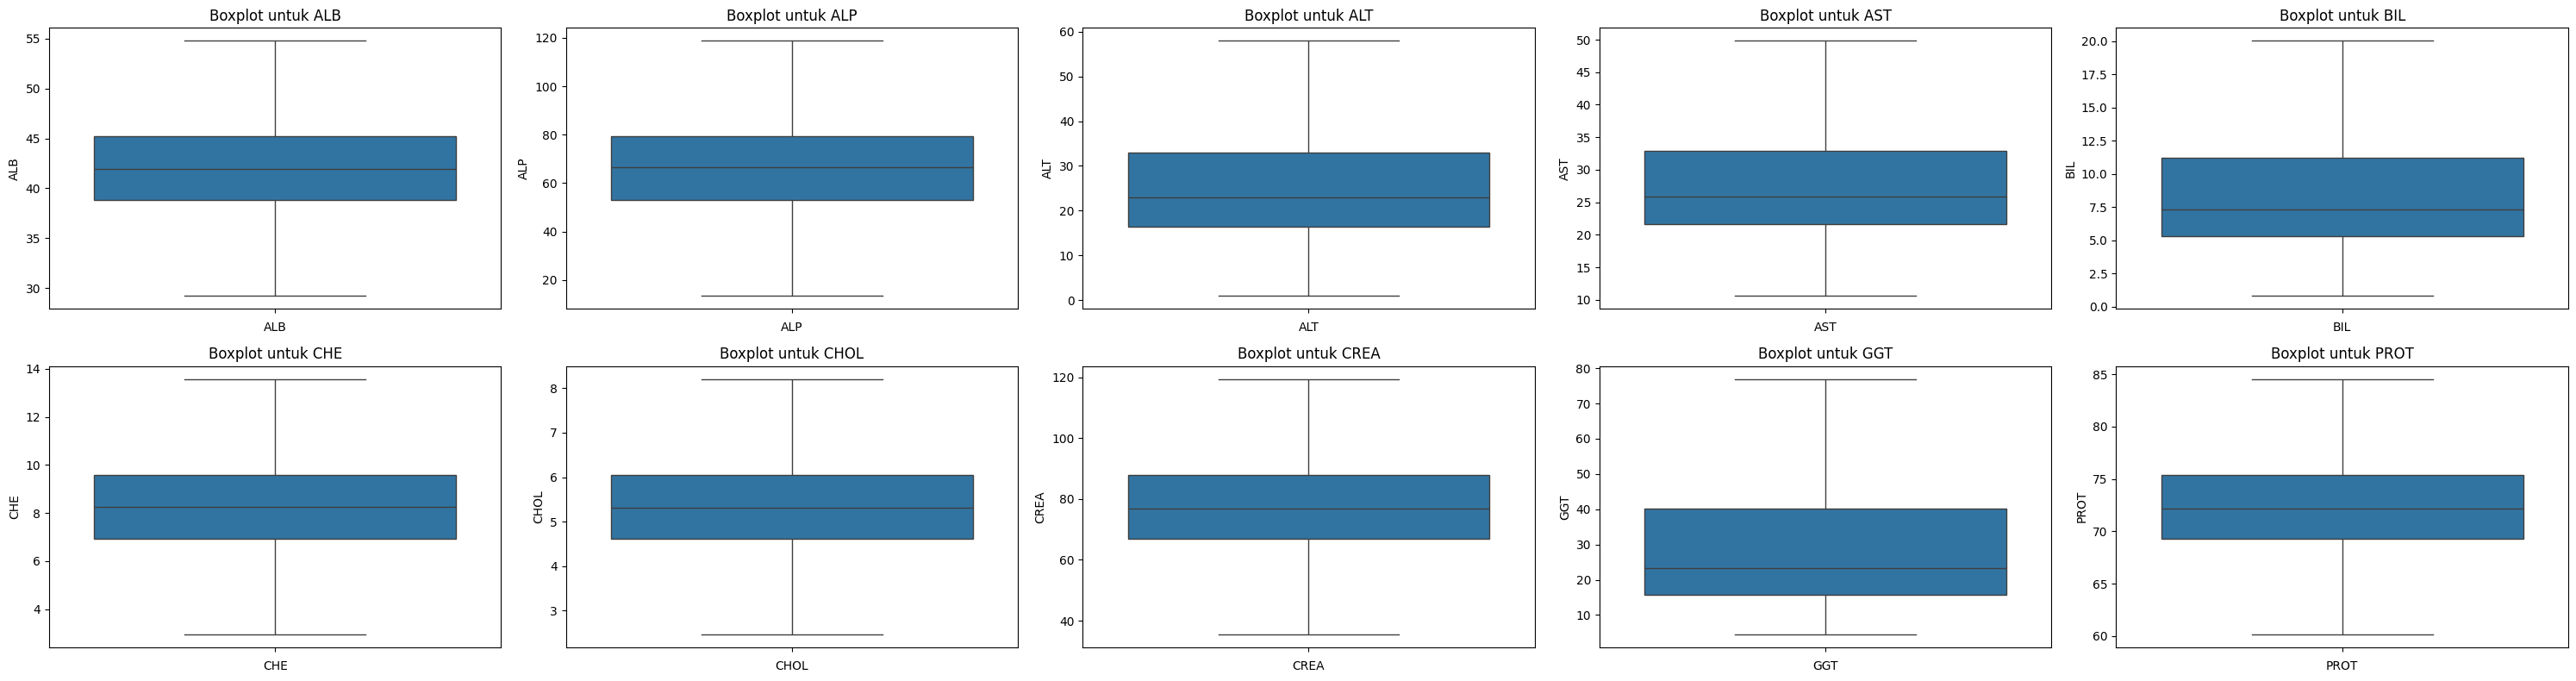

In [24]:
# Menentukan jumlah outlier untuk setiap kolom
# Kalkulasi lower_bound and upper_bound menggunakan current df dan columns_to_winsorize
Q1_updated = df[columns_to_winsorize].quantile(0.25)
Q3_updated = df[columns_to_winsorize].quantile(0.75)
IQR_updated = Q3_updated - Q1_updated
lower_bound_updated = Q1_updated - 1.5 * IQR_updated
upper_bound_updated = Q3_updated + 1.5 * IQR_updated

# Use the updated bounds for outlier detection
outliers = ((df[columns_to_winsorize] < lower_bound_updated) | (df[columns_to_winsorize] > upper_bound_updated)).sum()

# Menampilkan jumlah outlier per kolom
print("Jumlah Outlier per Kolom:")
print(outliers)

# Menentukan jumlah baris dan kolom untuk visualisasi (5 kolom)
n_cols = 5
n_rows = (len(columns_to_winsorize) // n_cols) + (len(columns_to_winsorize) % n_cols > 0)  # Menyesuaikan jumlah baris

# Set canvas ukuran untuk visualisasi
plt.figure(figsize=(n_cols * 6, n_rows * 4))  # Menyesuaikan ukuran figure

# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(columns_to_winsorize):
    plt.subplot(n_rows, n_cols, i + 1)  # Membuat grid dengan jumlah baris dan kolom yang disesuaikan
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot untuk {col}")
    plt.xlabel(col)

# Menampilkan plot
plt.tight_layout()
plt.show()

Terlihat bahwa outlier telah berhasil ditangani dengan menggunakan teknik winsorization dan tidak ditemukan adanya outlier lagi.

## **Encoding Fitur Kategoris**

In [25]:
# Mengubah nilai di DataFrame untuk Gender dan Category menjadi Numerikal
df['Sex'] = df['Sex'].replace({'m': 0, 'f': 1})
df['Category'] = df['Category'].replace({'Normal' : 0, 'Abnormal': 1})

<ipython-input-25-1e38d2cd7224>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'m': 0, 'f': 1})
<ipython-input-25-1e38d2cd7224>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Category'] = df['Category'].replace({'Normal' : 0, 'Abnormal': 1})


In [26]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.10,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.70,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,49.85,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.60,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.80,9.6,9.15,4.32,76.0,29.9,68.7


## **Split Dataset**
Langkah selanjutnya yang perlu dilakukan adalah membagi dataset menjadi data latih (train) dan data uji (test).

In [27]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Category'])
y = df['Category'].astype(int)

# Split data menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan jumlah data pada masing-masing set
print("Jumlah data pada X_train:", X_train.shape[0])
print("Jumlah data pada X_test:", X_test.shape[0])
print("Jumlah data pada y_train:", y_train.shape[0])
print("Jumlah data pada y_test:", y_test.shape[0])

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print("\nDistribusi kelas pada data pelatihan:\n", y_train.value_counts())
print("\nDistribusi kelas pada data uji:\n", y_test.value_counts())

Jumlah data pada X_train: 492
Jumlah data pada X_test: 123
Jumlah data pada y_train: 492
Jumlah data pada y_test: 123

Distribusi kelas pada data pelatihan:
 Category
0    432
1     60
Name: count, dtype: int64

Distribusi kelas pada data uji:
 Category
0    108
1     15
Name: count, dtype: int64


Data telah dibagi menjadi dua set: set pelatihan dan set uji, dengan 80% data digunakan untuk pelatihan dan 20% untuk pengujian. Jumlah data pada set pelatihan (492 data) dan set uji (123 data) telah ditampilkan, untuk memastikan bahwa proporsi data tetap konsisten.

Distribusi kelas pada set pelatihan menunjukkan 432 individu sehat atau tidak menderita penyakit hati/hepatitis c (category=0) dan 60 individu menderita penyakit hati/hepatitis c (category=1), sedangkan pada set uji, terdapat 108 individu tidak menderita penyakit hati dan 15 individu menderita penyakit hati.

## **Penanganan Imbalance Class**
Pada tahap EDA (Exploratory Data Analysis), diketahui terdapat ketidakseimbangan kelas pada kolom Category (Normal dan Abnormal). Oleh karena itu, perlu dilakukan penanganan untuk menyeimbangkan kelas menggunakan SMOTE.

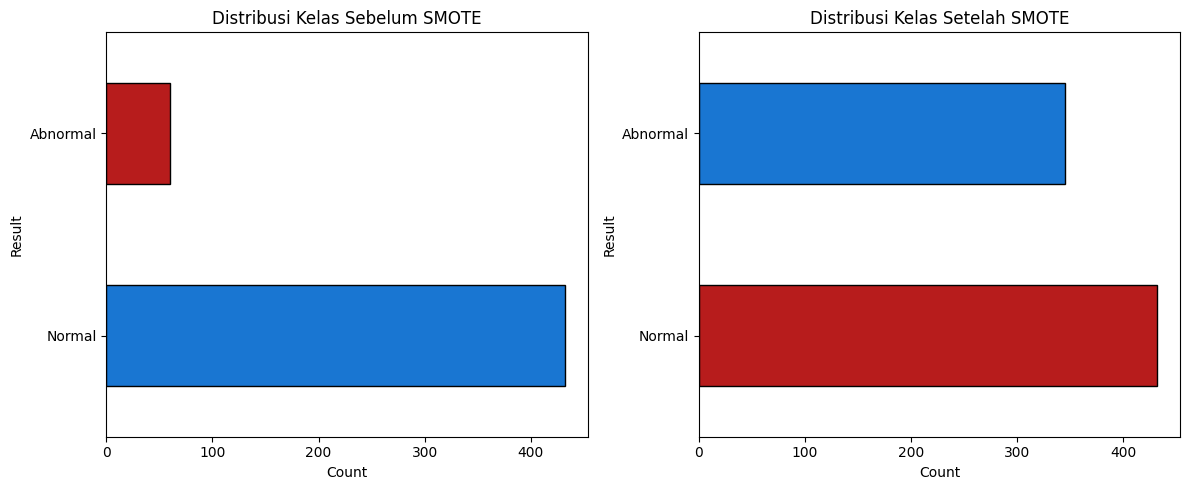

In [28]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Penanganan imbalance class dengan SMOTE (hanya di training set)
smote = SMOTE(sampling_strategy=0.8)  #Tidak perlu full balance (80%)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Mengganti label angka dengan kategori
y_train_labels = y_train.map({0: 'Normal', 1: 'Abnormal'})
y_train_resampled_labels = y_train_resampled.map({0: 'Normal', 1: 'Abnormal'})

# Plot distribusi kelas sebelum SMOTE
plt.figure(figsize=(12, 5))

# Plot pertama untuk sebelum SMOTE
plt.subplot(1, 2, 1)
y_train_labels.value_counts().plot.barh(color=['#1976D2', '#B71C1C'], edgecolor='black')
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xlabel('Count')
plt.ylabel('Result')

# Plot kedua untuk setelah SMOTE
plt.subplot(1, 2, 2)
y_train_resampled_labels.value_counts().plot.barh(color=['#B71C1C', '#1976D2'], edgecolor='black')
plt.title('Distribusi Kelas Setelah SMOTE')
plt.xlabel('Count')
plt.ylabel('Result')

# Menampilkan plot
plt.tight_layout()
plt.show()

Setelah dilakukan SMOTE (Synthetic Minority Oversampling Technique), terlihat bahwa data antara normal dan abnormal menjadi lebih seimbang dibandingkan sebelumnya.

## **Standarisasi**
Pada tahapan ini, dilakukan standarisasi pada data X_train_resampled menggunakan StandardScaler. Proses ini memastikan bahwa setiap fitur dalam data memiliki distribusi dengan rata-rata 0 dan standar deviasi 1.

In [29]:
# Standarisasi data (hanya di training set)
scaler = StandardScaler()

# Fit dan transform data pelatihan
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transform data uji menggunakan scaler yang sama
X_test_scaled = scaler.transform(X_test)

# Menampilkan contoh data setelah standarisasi
print("Contoh data X_train setelah dilakukan standarisasi:\n", X_train_scaled[:5])

Contoh data X_train setelah dilakukan standarisasi:
 [[-0.29535346 -0.60262583 -0.6798204   1.80367132 -0.57731827 -1.139535
  -1.075071    0.38347884  0.85318238 -0.63468183 -1.12959616 -0.32916119]
 [ 0.0043718  -0.60262583  0.13942569 -0.11702499  0.37286746 -0.78144279
  -0.69472259  0.34011615  0.526654   -0.50980584 -0.09174283  0.07387881]
 [ 2.30226544 -0.60262583 -2.27930086  0.94429937 -0.00596476  0.32614472
  -1.25618929 -0.7569599  -1.01528559 -0.88443382  0.19356346 -2.49550121]
 [ 0.80363915 -0.60262583  0.11991983 -0.18147789 -0.62700118 -1.56424901
  -0.78528174 -0.6312081   0.12756375  0.17701214 -1.19575414 -0.5306812 ]
 [-0.19544504 -0.60262583  0.15893155  0.4071919   1.12432153 -0.46498922
  -0.85772905  0.47020422  0.20919585 -0.38492984  1.07842646 -0.4500732 ]]


Hasil dari standarisasi terlihat bahwa nilai-nilai fitur yang sebelumnya memiliki rentang berbeda sekarang memiliki skala yang seragam, dimana hal ini penting untuk model yang sensitif terhadap skala data, seperti model K-Nearest Neighbor.

In [30]:
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_features].describe().round(4)

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,492.0000,492.0000,492.0000,492.0000,492.0000,492.0000,492.0000,492.0000,492.0000,492.0000,492.0000,492.0000
mean,47.0732,0.3801,41.6016,67.0881,26.1138,28.7088,8.9765,8.1513,5.3375,78.2667,31.5330,72.0270
std,9.9669,0.4859,4.9449,20.0296,13.8139,10.0190,5.0491,2.0580,1.0776,15.0527,21.3582,4.7443
min,19.0000,0.0000,29.2000,13.4250,1.2000,10.6000,0.8000,2.9525,2.4675,35.5000,4.5000,60.1500
25%,39.0000,0.0000,38.7000,52.5000,16.4000,21.6750,5.3000,6.9175,4.6000,67.0000,15.6000,69.1750
50%,46.5000,0.0000,41.8000,66.5000,22.8500,25.9500,7.4500,8.2100,5.2900,76.8500,23.3000,72.0000
75%,54.0000,1.0000,45.1000,79.3000,33.1500,32.9000,11.4250,9.5425,6.0200,88.0000,40.5250,75.2000
max,77.0000,1.0000,54.8000,118.8250,58.0250,49.8500,20.0500,13.5725,8.2075,119.5000,76.9500,84.5500


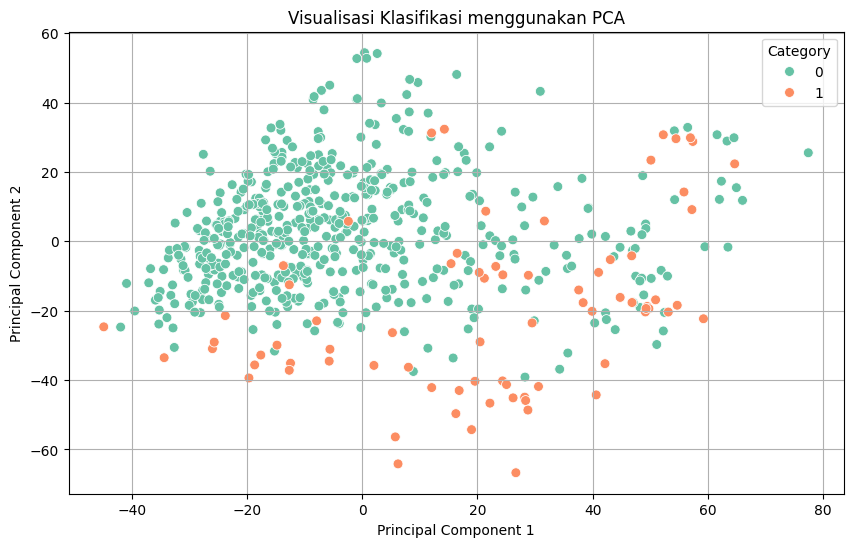

In [31]:
# Visualisasi dengan PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df.drop(columns=['Category']))
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
pca_df['Category'] = df['Category']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Category', palette='Set2', s=50)
plt.title('Visualisasi Klasifikasi menggunakan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Category')
plt.grid()
plt.show()

# **Model Development**


In [32]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['DecisionTree', 'KNN', 'RandomForest', 'LogisticRegression'])

## **Training Model**

Pembangunan model diawali dengan pelatihan model, dalam proyek ini dilakukan dengan menggunakan 4 model yaitu random forest, decision tree, logistic regression, dan KNN.

In [33]:
rf = RandomForestClassifier().fit(X_train_scaled, y_train_resampled)
dt = DecisionTreeClassifier().fit(X_train_scaled, y_train_resampled)
lr = LogisticRegression().fit(X_train_scaled, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_scaled, y_train_resampled)
print("Model training selesai.")

Model training selesai.


## **Evaluasi Model**

Setelah training model, perlu dilakukan evaluasi awal model.


Model: Random Forest Classifier (RF)


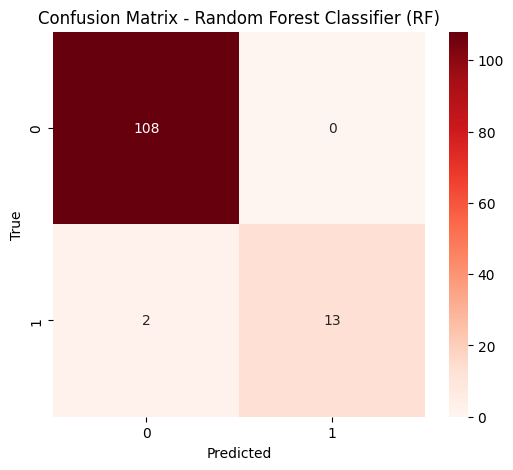

Accuracy: 0.9837
Precision: 0.9840
Recall: 0.9837
F1-Score: 0.9832

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       1.00      0.87      0.93        15

    accuracy                           0.98       123
   macro avg       0.99      0.93      0.96       123
weighted avg       0.98      0.98      0.98       123


Model: Decision Tree Classifier (DT)


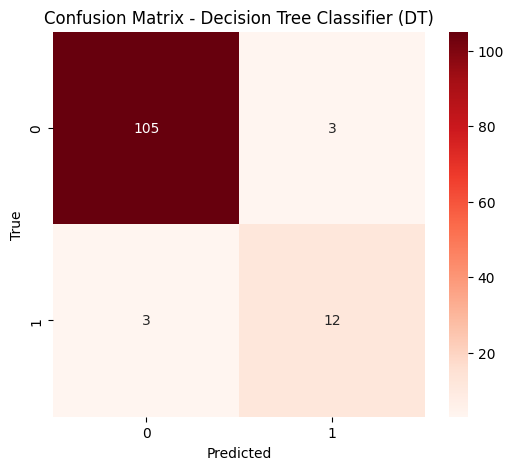

Accuracy: 0.9512
Precision: 0.9512
Recall: 0.9512
F1-Score: 0.9512

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.80      0.80      0.80        15

    accuracy                           0.95       123
   macro avg       0.89      0.89      0.89       123
weighted avg       0.95      0.95      0.95       123


Model: Logistic Regression (LR)


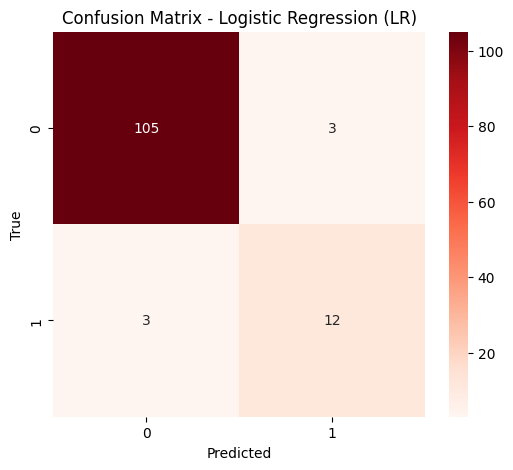

Accuracy: 0.9512
Precision: 0.9512
Recall: 0.9512
F1-Score: 0.9512

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.80      0.80      0.80        15

    accuracy                           0.95       123
   macro avg       0.89      0.89      0.89       123
weighted avg       0.95      0.95      0.95       123


Model: K-Nearest Neighbors (KNN)


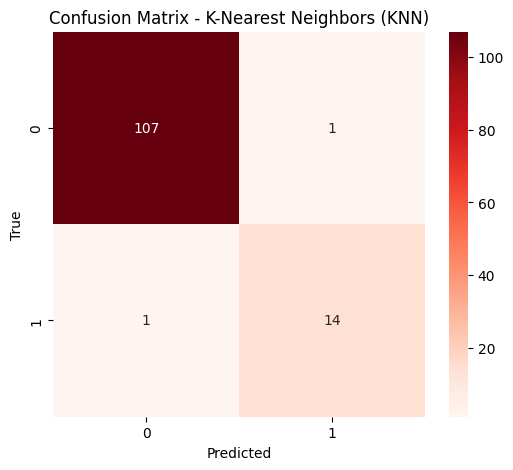

Accuracy: 0.9837
Precision: 0.9837
Recall: 0.9837
F1-Score: 0.9837

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.93      0.93      0.93        15

    accuracy                           0.98       123
   macro avg       0.96      0.96      0.96       123
weighted avg       0.98      0.98      0.98       123

                           Model  Accuracy  Precision   Recall  F1-Score
0  Random Forest Classifier (RF)   0.98374   0.984035  0.98374  0.983234
1  Decision Tree Classifier (DT)   0.95122   0.951220  0.95122  0.951220
2       Logistic Regression (LR)   0.95122   0.951220  0.95122  0.951220
3      K-Nearest Neighbors (KNN)   0.98374   0.983740  0.98374  0.983740


In [34]:
# Fungsi untuk evaluasi model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  # Confusion matrix

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        'Classification Report': classification_report(y_test, y_pred)
    }

    # Plot Confusion Matrix
    plot_confusion_matrix(cm, model_name)

    return results

# Fungsi untuk menampilkan Confusion Matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


# Model yang akan diuji
models = {
    'Random Forest Classifier (RF)': rf,
    'Decision Tree Classifier (DT)': dt,
    'Logistic Regression (LR)': lr,
    'K-Nearest Neighbors (KNN)': knn,
}

# Inisialisasi dictionary hasil evaluasi
results = {}

# Evaluasi semua model
for model_name, model in models.items():
    print(f"\nModel: {model_name}")
    results[model_name] = evaluate_model(model, X_test_scaled, y_test, model_name)
    print(f"Accuracy: {results[model_name]['Accuracy']:.4f}")
    print(f"Precision: {results[model_name]['Precision']:.4f}")
    print(f"Recall: {results[model_name]['Recall']:.4f}")
    print(f"F1-Score: {results[model_name]['F1-Score']:.4f}")
    print("\nClassification Report:")
    print(results[model_name]['Classification Report'])
    print("="*60)

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil evaluasi
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar hasil ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan hasil ringkasan
print(summary_df)

- Berdasarkan dari hasil evaluasi model diatas, terlihat model Random Forest menjadi model yang paling unggul dalam hal akurasi, presisi, recall, dan f1-score, diikuti oleh K-Nearest Neighbor (KNN), Logistic Regression dan  Decision Tree.
- Meskipun perbedaan hasil evaluasi menunjukkan perbedaan tipis dan cenderung sama dengan KNN, namun model yang akan dipilih yaitu Random Forest. Pemilihan ini didasarkan pada beberapa hal diantaranya, keunggulan model Random Forest dimana konsisten terhadap semua metrik, RF lebih tahan terhadap noise dan overfitting dibanding KNN dan dapat menganalisis pentingnya fitur (feature importance). Random Forest memiliki nilai Akurasi, Precision, Recall dan F1-Score tertinggi, mengindikasikan keseimbangan terbaik antara true positive dan true negative, serta false positive dan false negative. Model ini memberikan insight mengenai fitur yang paling relevan dan memberikan hasil yang optimal pada dataset yang diuji.

## **Tuning Model Klasifikasi**

Tahap Tuning model dilakukan dengan menggunakan GridSearchCV untuk mencari kombinasi parameter terbaik untuk setiap model dan kemudian menyimpannya.

- **Tuning Model Random Forest**

In [35]:
# Menyiapkan parameter grid untuk tuning RF
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 8]
}

# Menyiapkan GridSearchCV
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)

# Melakukan fitting GridSearchCV
grid_rf.fit(X_train_scaled, y_train_resampled)

# Menampilkan hasil terbaik
print("Best Params for Random Forest:", grid_rf.best_params_)

# Mendapatkan model terbaik
best_rf = grid_rf.best_estimator_

Best Params for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


- **Tuning Model Decision Tree**

In [36]:
# Menyiapkan parameter grid untuk tuning DT
param_grid_dt = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 7, 10],
    'criterion': ['gini', 'entropy']
}

# Menyiapkan GridSearchCV
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)

# Melakukan fitting GridSearchCV
grid_dt.fit(X_train_scaled, y_train_resampled)

# Menampilkan hasil terbaik
print("Best Params for Decision Tree:", grid_dt.best_params_)

# Mendapatkan model terbaik
best_dt = grid_dt.best_estimator_

Best Params for Decision Tree: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 7}


- **Tuning Model Logistic Regression**

In [37]:
# Menyiapkan parameter grid untuk tuning LR
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1],
    'solver': ['liblinear', 'saga'],
}

# Menyiapkan GridSearchCV
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)

# Melakukan fitting GridSearchCV
grid_lr.fit(X_train_scaled, y_train_resampled)

# Menampilkan hasil terbaik
print(f"Best params for Logistic Regression:", grid_lr.best_params_)

# Mendapatkan model terbaik
best_lr = grid_lr.best_estimator_

Best params for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


- **Tuning Model K-Nearest Neighbor**

In [38]:
# Menyiapkan parameter grid untuk tuning KNN
param_grid_knn = {
    'n_neighbors': [1, 31, 2],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Menyiapkan GridSearchCV
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)

# Melakukan fitting GridSearchCV
grid_knn.fit(X_train_scaled, y_train_resampled)

# Menampilkan hasil terbaik
print("Best Params for KNN:", grid_knn.best_params_)

# Mendapatkan model terbaik
best_knn = grid_knn.best_estimator_

# Menyiapkan GridSearchCV
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)

# Melakukan fitting GridSearchCV
grid_knn.fit(X_train_scaled, y_train_resampled)

# Menampilkan hasil terbaik
print("Best Params for KNN:", grid_knn.best_params_)

# Mendapatkan model terbaik
best_knn = grid_knn.best_estimator_

Best Params for KNN: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best Params for KNN: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [39]:
# Menyusun hasil terbaik dalam bentuk summary
results_summary = {
    'Random Forest (RF)': grid_rf.best_params_,
    'Decision Tree (DT)': grid_dt.best_params_,
    'Logistic Regression (LR)': grid_lr.best_params_,
    'K-Nearest Neighbors (KNN)': grid_knn.best_params_
}

# Menampilkan summary hasil best parameters
print("Summary of Best Parameters for Each Model:")
for model_name, best_params in results_summary.items():
    print(f"\n{model_name}:")
    for param, value in best_params.items():
        print(f"  {param}: {value}")

Summary of Best Parameters for Each Model:

Random Forest (RF):
  max_depth: 10
  min_samples_split: 2
  n_estimators: 100

Decision Tree (DT):
  criterion: entropy
  max_depth: 7
  min_samples_split: 7

Logistic Regression (LR):
  C: 1
  penalty: l2
  solver: saga

K-Nearest Neighbors (KNN):
  metric: manhattan
  n_neighbors: 1
  weights: uniform


## **Evaluasi Model Setelah Dilakukan Tunning**

Kemudian setelah menemukan kombinasi parameter terbaik dari hasil tuning, model dievaluasi ulang untuk melihat perbandingan performanya.


Model: Random Forest (RF)


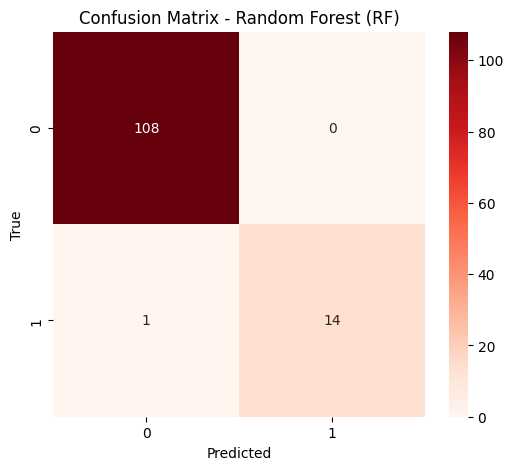

Accuracy: 0.9919
Precision: 0.9919
Recall: 0.9919
F1-Score: 0.9917

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       1.00      0.93      0.97        15

    accuracy                           0.99       123
   macro avg       1.00      0.97      0.98       123
weighted avg       0.99      0.99      0.99       123


Model: Decision Tree (DT)


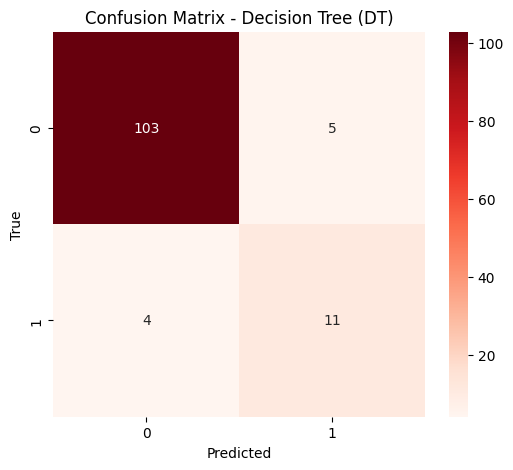

Accuracy: 0.9268
Precision: 0.9291
Recall: 0.9268
F1-Score: 0.9278

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       108
           1       0.69      0.73      0.71        15

    accuracy                           0.93       123
   macro avg       0.83      0.84      0.83       123
weighted avg       0.93      0.93      0.93       123


Model: Logistic Regression (LR)


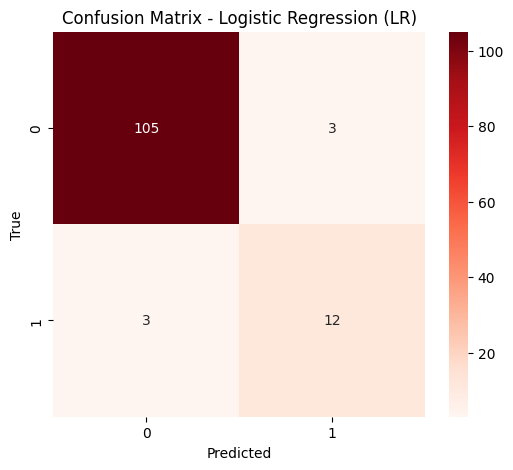

Accuracy: 0.9512
Precision: 0.9512
Recall: 0.9512
F1-Score: 0.9512

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.80      0.80      0.80        15

    accuracy                           0.95       123
   macro avg       0.89      0.89      0.89       123
weighted avg       0.95      0.95      0.95       123


Model: K-Nearest Neighbors (KNN)


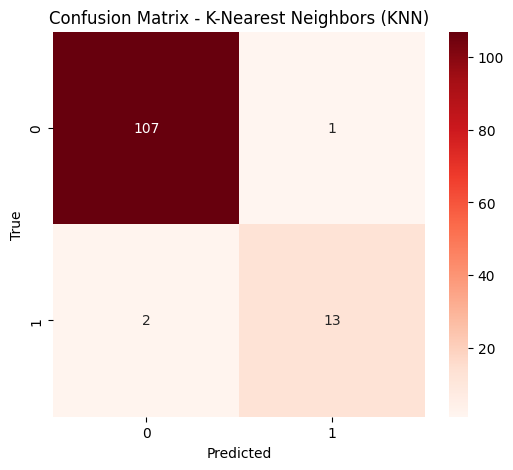

Accuracy: 0.9756
Precision: 0.9752
Recall: 0.9756
F1-Score: 0.9752

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.93      0.87      0.90        15

    accuracy                           0.98       123
   macro avg       0.96      0.93      0.94       123
weighted avg       0.98      0.98      0.98       123

                       Model  Accuracy  Precision    Recall  F1-Score
0         Random Forest (RF)  0.991870   0.991945  0.991870  0.991748
1         Decision Tree (DT)  0.926829   0.929066  0.926829  0.927839
2   Logistic Regression (LR)  0.951220   0.951220  0.951220  0.951220
3  K-Nearest Neighbors (KNN)  0.975610   0.975178  0.975610  0.975245


In [40]:
# Model yang akan diuji
models = {
    'Random Forest (RF)': best_rf,
    'Decision Tree (DT)': best_dt,
    'Logistic Regression (LR)': best_lr,
    'K-Nearest Neighbors (KNN)': best_knn,
}

# Inisialisasi dictionary hasil evaluasi
results_after_tuning = {}

# Evaluasi semua model
for model_name, model in models.items():
    print(f"\nModel: {model_name}")
    results_after_tuning[model_name] = evaluate_model(model, X_test_scaled, y_test, model_name)
    print(f"Accuracy: {results_after_tuning[model_name]['Accuracy']:.4f}")
    print(f"Precision: {results_after_tuning[model_name]['Precision']:.4f}")
    print(f"Recall: {results_after_tuning[model_name]['Recall']:.4f}")
    print(f"F1-Score: {results_after_tuning[model_name]['F1-Score']:.4f}")
    print("\nClassification Report:")
    print(results_after_tuning[model_name]['Classification Report'])
    print("="*60)

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil evaluasi
rows = []
for model_name, metrics in results_after_tuning.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar hasil ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan hasil ringkasan
print(summary_df)

## **Visualisasi Perbandingan Sebelum dan Setelah Tuning Model**

Dalam visualisasi ini, Recall dipilih sebagai metrik utama karena mengukur persentase instance positif yang berhasil diidentifikasi dan fokus pada kemampuan model menangkap semua pasien yang menderita Hepatitis C (mencegah false negative), daripada menghindari beberapa false positives.

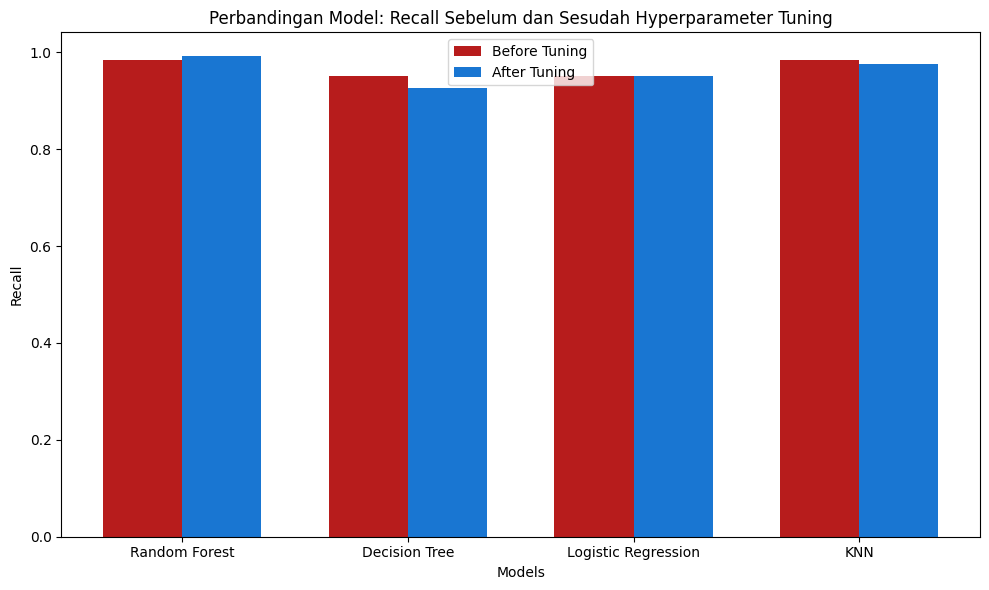

In [41]:
# Hasil evaluasi Recall sebelum tuning
before_tuning_recall = [
    results['Random Forest Classifier (RF)']['Recall'],
    results['Decision Tree Classifier (DT)']['Recall'],
    results['Logistic Regression (LR)']['Recall'],
    results['K-Nearest Neighbors (KNN)']['Recall']
]

# Hasil evaluasi Recall setelah tuning
after_tuning_recall = [
    results_after_tuning['Random Forest (RF)']['Recall'],
    results_after_tuning['Decision Tree (DT)']['Recall'],
    results_after_tuning['Logistic Regression (LR)']['Recall'],
    results_after_tuning['K-Nearest Neighbors (KNN)']['Recall']
]

# Model names
models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'KNN']

# Membuat grafik batang untuk perbandingan Recall
x = range(len(models))
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Plot sebelum tuning
ax.bar(x, before_tuning_recall, bar_width, label='Before Tuning', color='#B71C1C')

# Plot setelah tuning
ax.bar([p + bar_width for p in x], after_tuning_recall, bar_width, label='After Tuning', color='#1976D2')

# Menambahkan judul dan label
ax.set_title('Perbandingan Model: Recall Sebelum dan Sesudah Hyperparameter Tuning')
ax.set_xlabel('Models')
ax.set_ylabel('Recall')
ax.set_xticks([p + bar_width/2 for p in x])
ax.set_xticklabels(models)

# Menambahkan legenda
ax.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()


Terlihat nilai hasil evaluasi yang paling unggul yaitu pada model Random Forest, dan terlihat sedikit ada peningkatan setelah dilakukan tuning. Sedangkan model Decision Tree dan KNN terlihat sedikit penurunan setelah dilakukan tuning. Dan model Logistic cenderung stagnan terlihat tidak ada perubahan setelah dilakukan proses tuning.

## **Membandingkan Hasil Evaluasi Tiap Model Menggunakan Metrik MSE**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserW

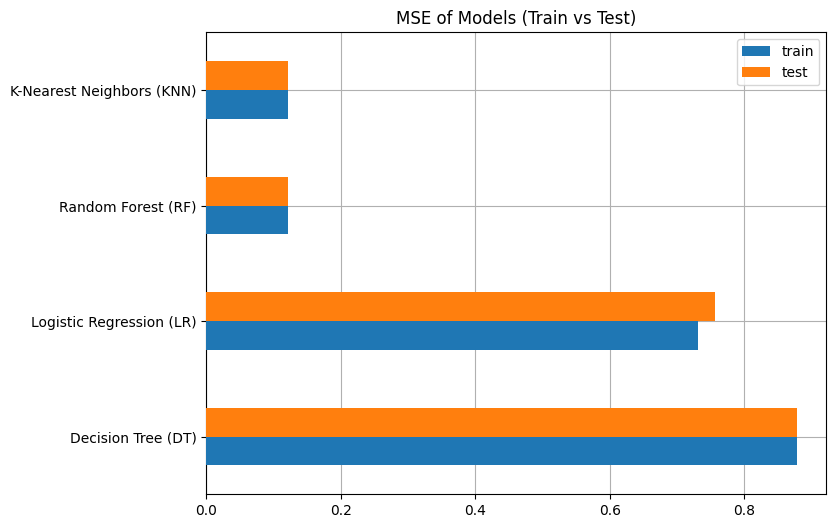

In [42]:
from sklearn.metrics import mean_squared_error

models = {
    'Random Forest (RF)': best_rf,
    'Decision Tree (DT)': best_dt,
    'Logistic Regression (LR)': best_lr,
    'K-Nearest Neighbors (KNN)': best_knn,
}

# Mengisi DataFrame mse
mse = pd.DataFrame(columns=['train', 'test'], index=models.keys())
for name, model in models.items():
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    mse.loc[name, 'train'] = mean_squared_error(y_train, train_pred)
    mse.loc[name, 'test'] = mean_squared_error(y_test, test_pred)

# Membuat plot
fig, ax = plt.subplots(figsize=(8, 6))
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.set_title('MSE of Models (Train vs Test)')
ax.grid(zorder=0)
plt.show()


Dari gambar di atas, terlihat bahwa model Random Forest (RF) menunjukkan performa terbaik dengan nilai eror (MSE) terendah pada data test, mengindikasikan kemampuan generalisasi yang baik. Model  K-Nearest Neighbors (KNN) terlihat cenderung sama dengan Random Forest tetapi pada nilai MSE data test menunjukkan jauh lebih tinggi dibandingkan Random Forest. Model Logistic Regression (LR) terlihat eror sebesar > 0.6. Sedangkan Decision Tree mencatat eror paling besar (MSE > 0.8 pada test set).

Setelah seluruh model machine learning dilatih menggunakan parameter default, dan dilanjutkan dengan proses tuning model, hasilnya menunjukkan performansi yang sangat baik pada **model Random Forest, dengan skor evaluasi yang paling tinggi pada metrik akurasi, presisi, recall, maupun F1-score**. Seluruh metrik tersebut menunjukkan bahwa model mampu memberikan hasil prediksi yang akurat dan seimbang antara deteksi positif dan negatif.

Pemilihan model terbaik dilakukan berdasarkan perbandingan hasil metrik evaluasi seluruh model yang diuji. Random Forest berhasil mencatatkan nilai akurasi yang tinggi, presisi yang baik dalam menghindari false positives, serta recall yang sangat penting dalam konteks medis, yang menunjukkan kemampuannya dalam menangkap semua kasus yang seharusnya terdeteksi (mencegah false negatives). Selain itu, nilai F1-score juga tinggi, menandakan keseimbangan performa antara presisi dan recall.

Ditambah lagi, hasil evaluasi menggunakan MSE (Mean Squared Error) menunjukkan bahwa **model Random Forest memiliki nilai MSE terendah** dibandingkan model lainnya, yang berarti prediksi yang dihasilkan lebih mendekati nilai aktual. Meskipun model KNN menunjukkan hasil yang cenderung sama pada MSE, jika dibandingkan dengan hasil evaluasi menggunakan metrik evaluasi, model Random Forest lebih unggul dibandingkan KNN. Sehingga berdasarkan performa terbaik di seluruh metrik utama dan MSE yang rendah, **Random Forest dipilih sebagai model terbaik** dalam proyek ini karena memberikan prediksi yang paling akurat, stabil, dan andal untuk mendeteksi kondisi pasien Hepatitis C.

# **Predict**

In [43]:
models = {
    'Random Forest (RF)': best_rf,
    'Decision Tree (DT)': best_dt,
    'Logistic Regression (LR)': best_lr,
    'K-Nearest Neighbors (KNN)': best_knn,
}

# Melakukan pengujian terhadap model
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in models.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,y_true,prediksi_Random Forest (RF),prediksi_Decision Tree (DT),prediksi_Logistic Regression (LR),prediksi_K-Nearest Neighbors (KNN)
427,0,0,1,1,0


Secara keseluruhan, Random Forest tetap menjadi model yang paling unggul setelah dilakukan evaluasi model dengan nilai akurasi yang sangat tinggi dan metrik evaluasi lainnya yang juga tinggi. Nilai Recall yang tinggi sangat diutamakan dalam kasus diagnosis medis, karena lebih penting untuk analisa guna menangkap semua individu yang menderita penyakit hepatitis C (mencegah false negatives) daripada menghindari beberapa false positives. Dalam konteks ini, false negatives (individu yang seharusnya didiagnosis poitif penyakit hati tetapi tidak terdeteksi) sehingga dapat berakibat fatal karena individu tersebut tidak menerima perawatan yang seharusnya diperlukan. Maka dari itu, model dengan Recall yang lebih tinggi, seperti Random Forest, sangat diutamakan untuk memastikan bahwa sebanyak mungkin individu yang menderita penyakit hepatitis C dapat terdeteksi dan dapat diberi penanganan yang tepat.